# 프로젝트 개요
- 제목: 은행계좌
- 설명: 은행계좌를 열어놓을지 닫을지 예측하는 머신러닝모델 만드는 프로젝트
- 사용 데이터셋
    - 은행 데이터: 은행손님 계좌 정보 데이터
- 진행절차
    - 데이터 로딩 및 EDA 진행
    - 기계학습으로 은행계좌여부 예측모델
- 사용한 기술 스택
    - pandas
    - seaborn
    - scikit learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 


In [2]:
bank_account_df=pd.read_csv("C:/Users/eagls/Downloads/playground-series-s4e1/train.csv")
bank_account_df_t=pd.read_csv("C:/Users/eagls/Downloads/playground-series-s4e1/test.csv")
submission = pd.read_csv("C:/Users/eagls/Downloads/playground-series-s4e1/sample_submission.csv")

In [3]:
bank_account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
bank_account_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
bank_account_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
bank_account_df.shape

(165034, 14)

In [7]:
bank_account_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [8]:
def generation(age):
    if age<20:
        return 10
    elif age<30:
        return 20
    elif age<40:
        return 30
    elif age < 50:
        return 40
    elif age <60:
        return 50
    elif age <70:
        return 60
    else:
        return 70

In [9]:
bank_account_df['Generation'] = bank_account_df['Age'].apply(generation)

In [10]:
bank_account_df['Balance_vs_Salary'] =bank_account_df['Balance']/bank_account_df['EstimatedSalary'] 

In [11]:
bank_account_df['Total_asset']= bank_account_df['Balance']+bank_account_df['EstimatedSalary']

In [12]:
bank_account_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Generation,Balance_vs_Salary,Total_asset
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,30,0.000000,181449.97
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,30,0.000000,49503.50
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,40,0.000000,184866.69
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30,1.760655,233443.42
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,30,0.000000,15068.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,30,0.000000,131834.75
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,30,0.000000,131834.45
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,30,0.000000,127429.56
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,30,2.269582,232706.03


<Axes: >

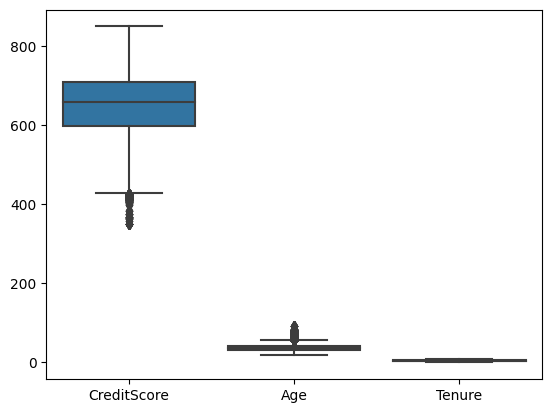

In [13]:
sns.boxplot(data=bank_account_df[['CreditScore','Age','Tenure']])

<Axes: >

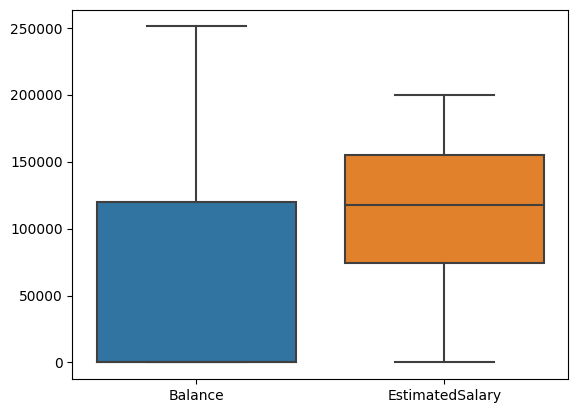

In [14]:
sns.boxplot(data=bank_account_df[['Balance','EstimatedSalary']])

In [15]:
exit_counts = bank_account_df.groupby('Exited')['Exited'].value_counts().reset_index(name='count')

In [16]:
exit_counts

,Exited,count
0,0,130113
1,1,34921


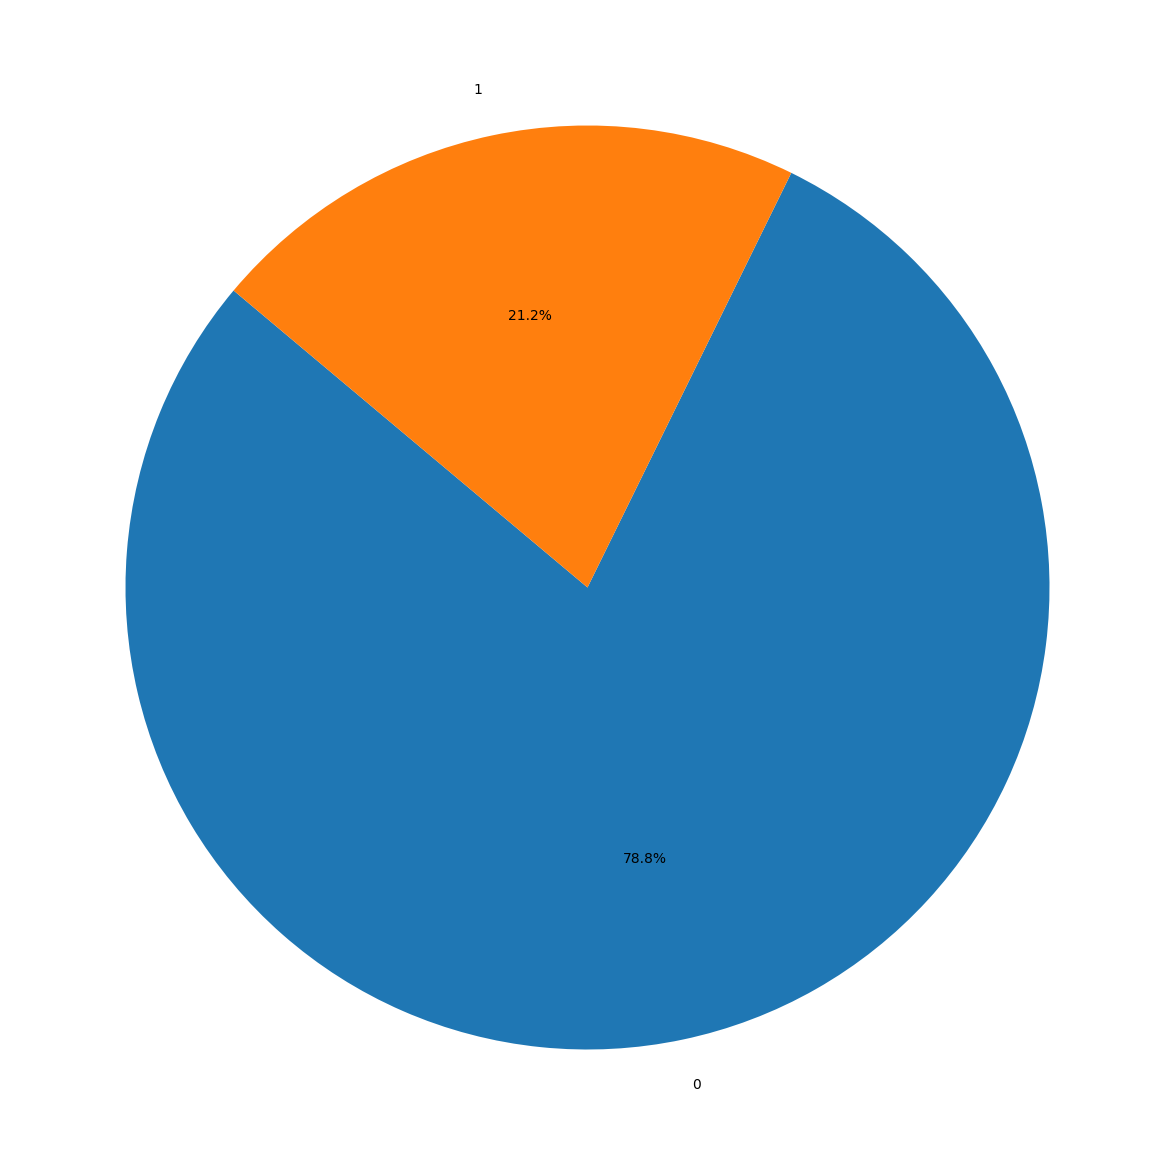

In [17]:
plt.figure(figsize=(15, 15))
plt.pie(exit_counts['count'], labels=exit_counts['Exited'], autopct='%1.1f%%', startangle=140)
plt.show()

In [18]:
exit_country = bank_account_df.groupby('Geography')['Exited'].count().reset_index(name='count')

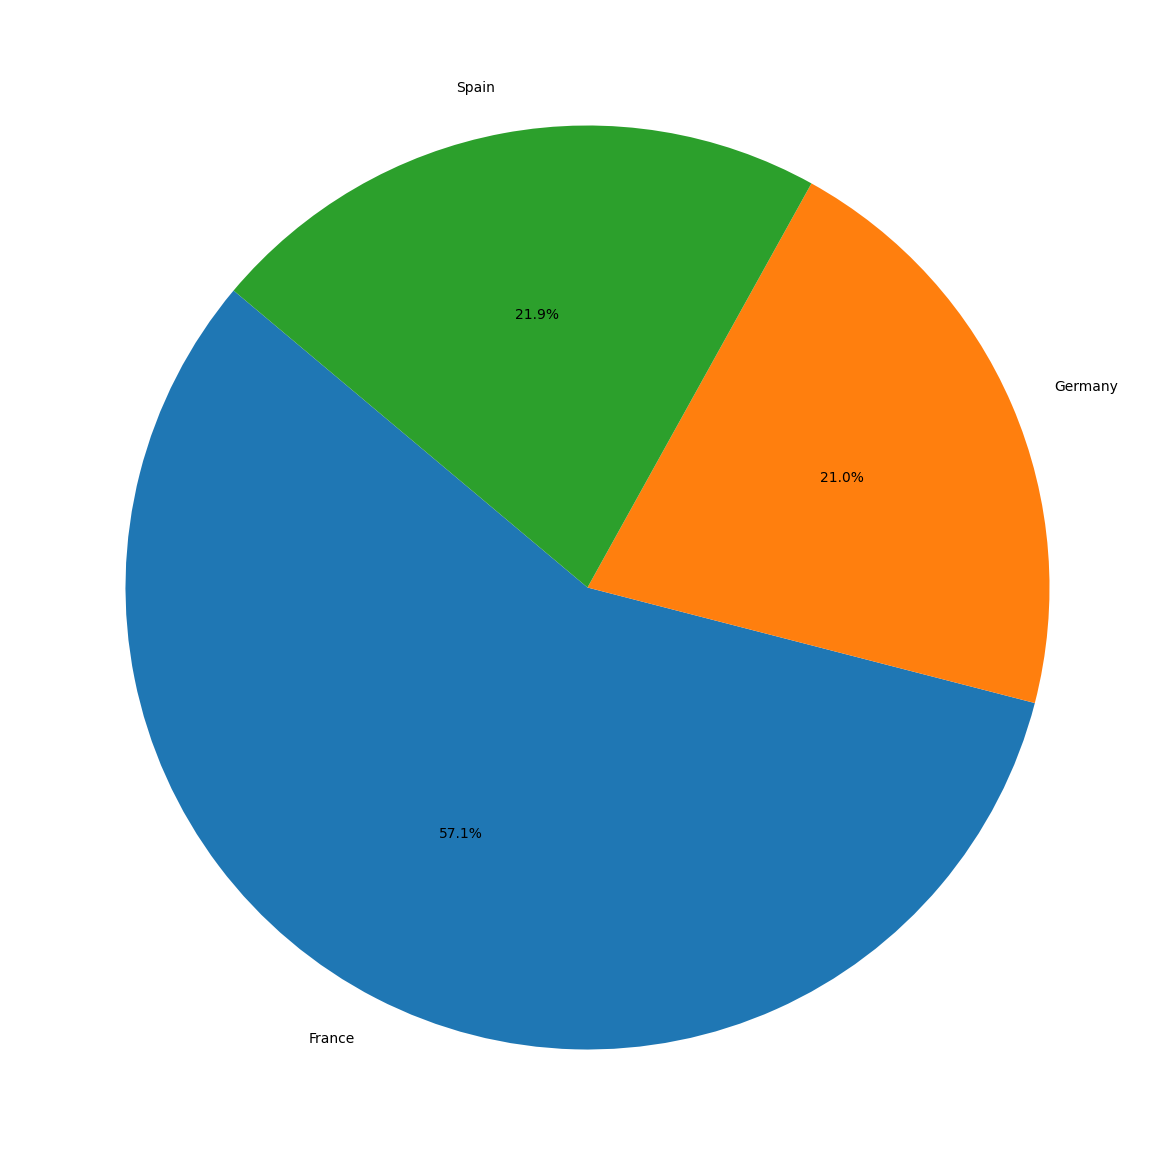

In [19]:
plt.figure(figsize=(15, 15))
plt.pie(exit_country ['count'], labels=exit_country['Geography'], autopct='%1.1f%%', startangle=140)
plt.show()

In [20]:
exited_balance = bank_account_df.groupby('Exited')['Balance'].mean().reset_index()

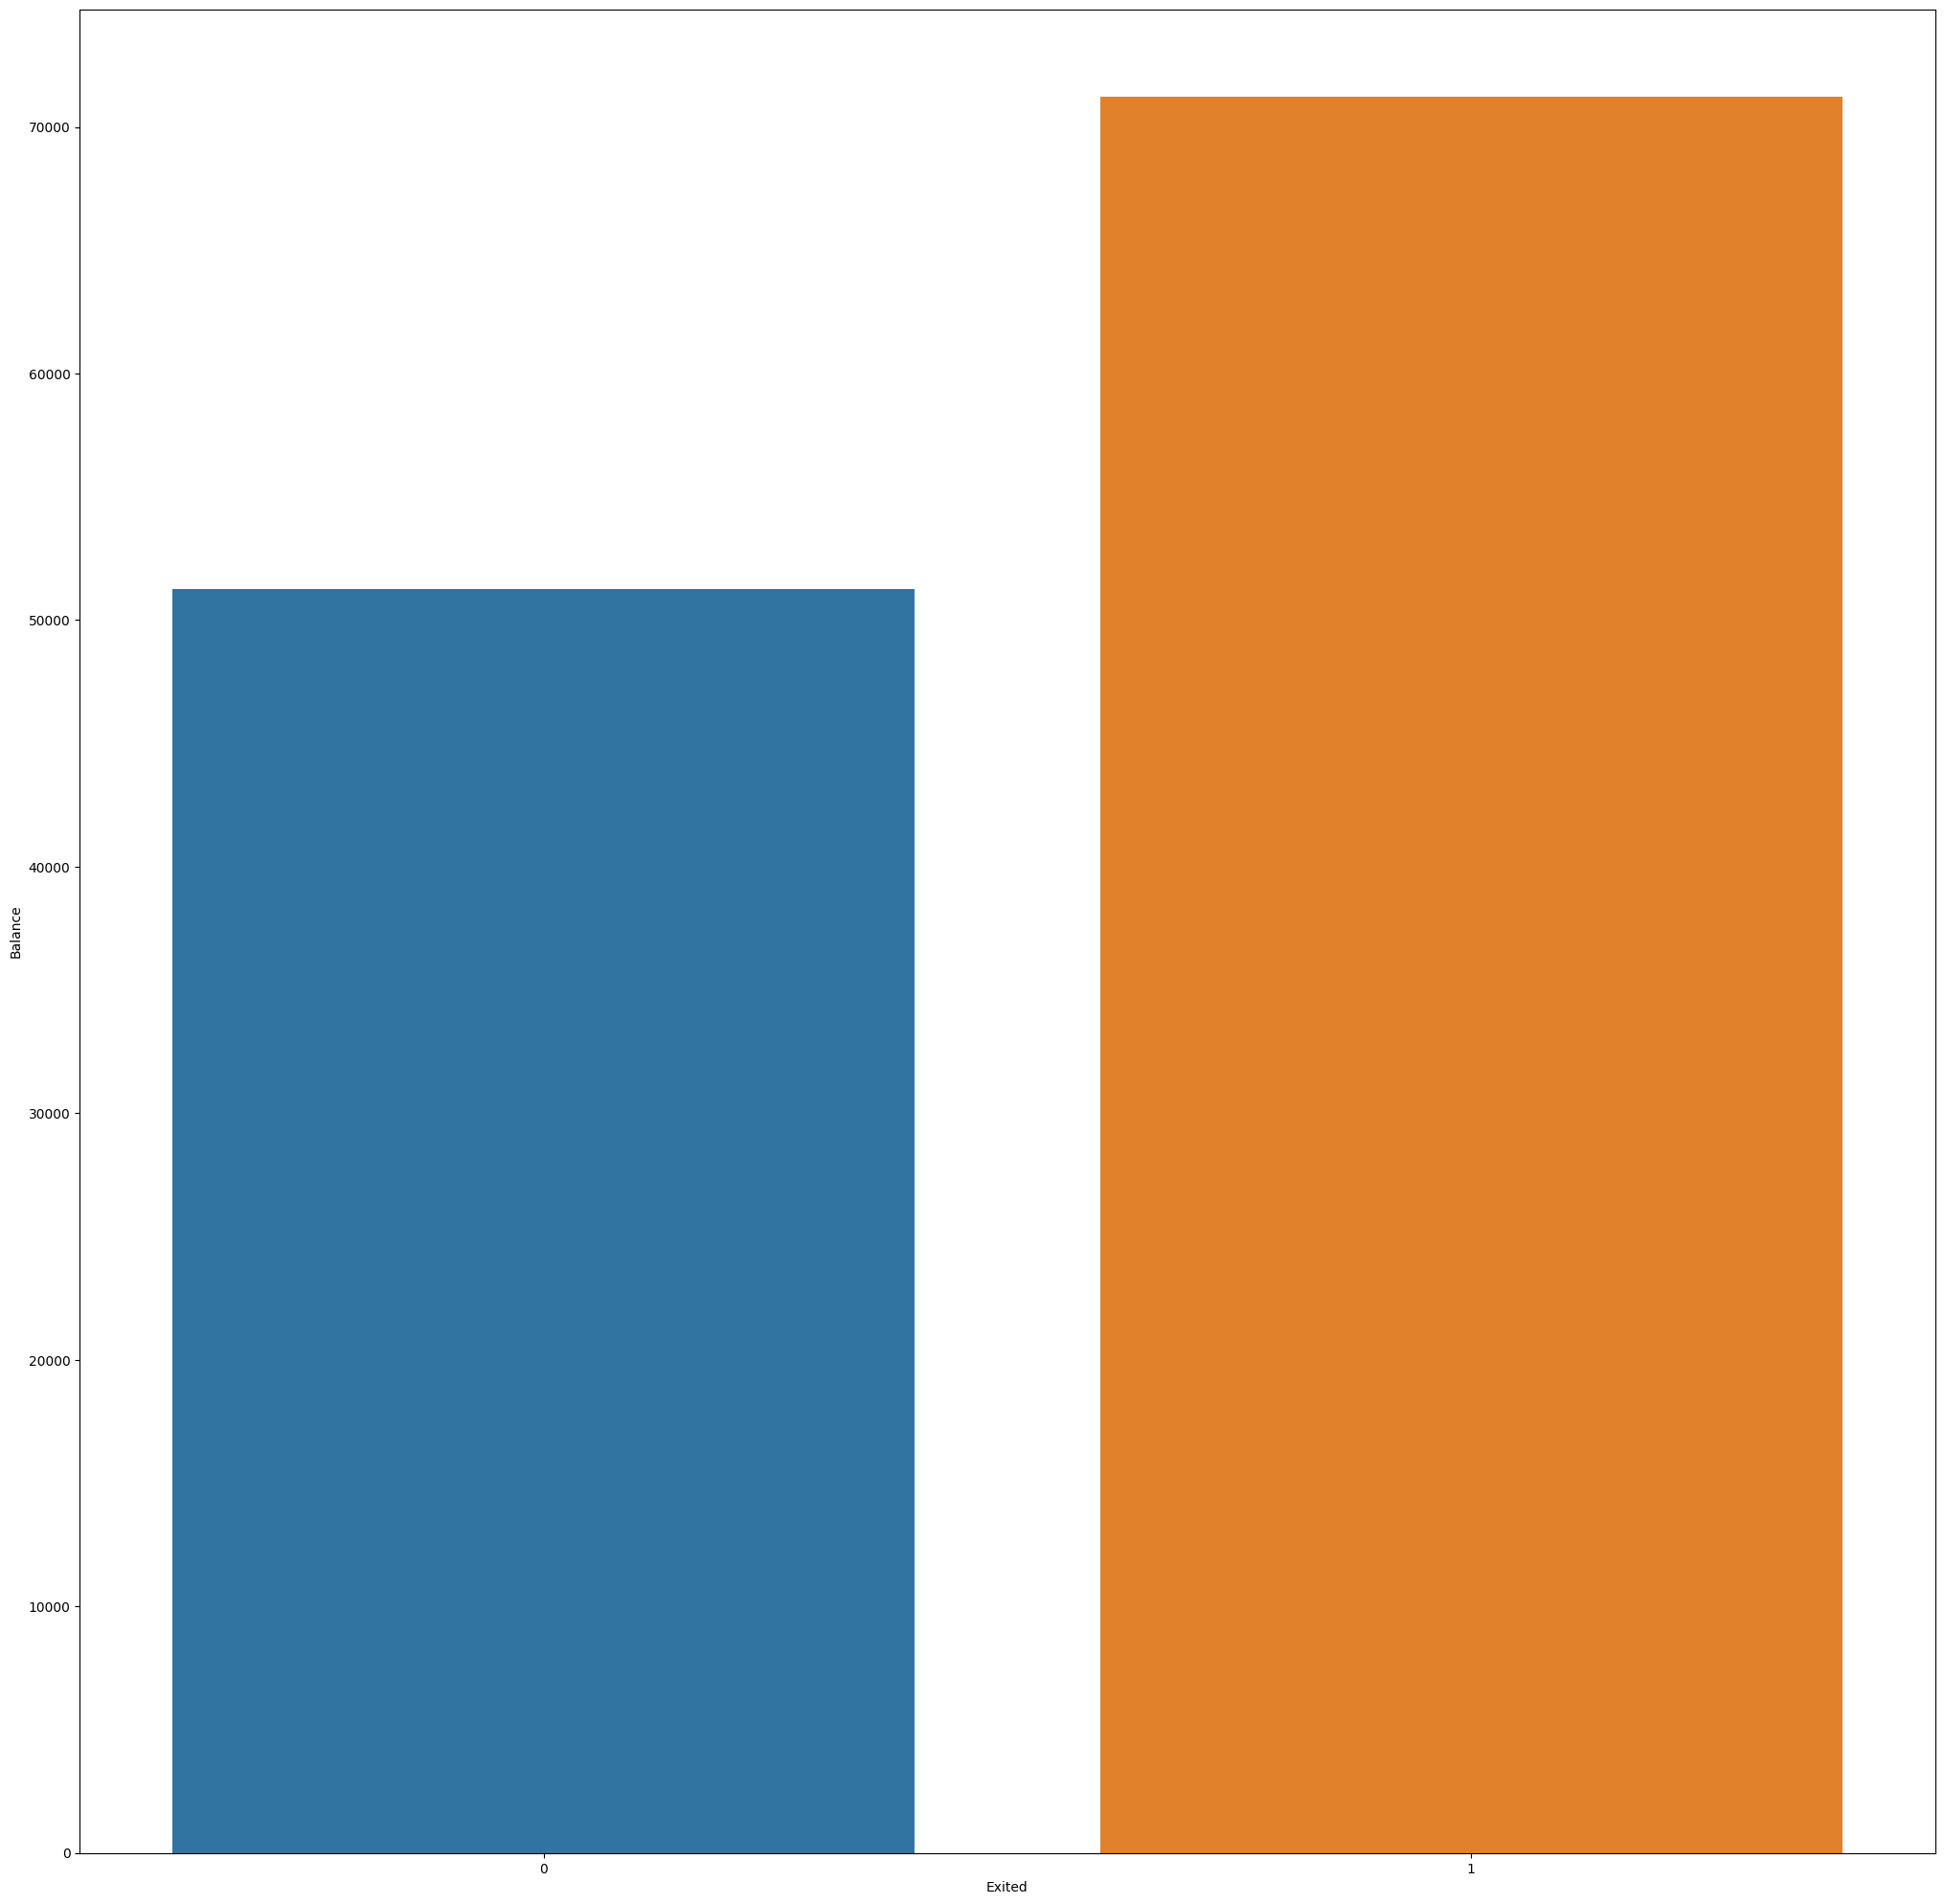

In [21]:
plt.figure(figsize=(25, 25))
sns.barplot(data=exited_balance, x='Exited', y='Balance')
plt.show()

In [22]:
salary_exit = bank_account_df.groupby('Exited')['EstimatedSalary'].mean().reset_index()

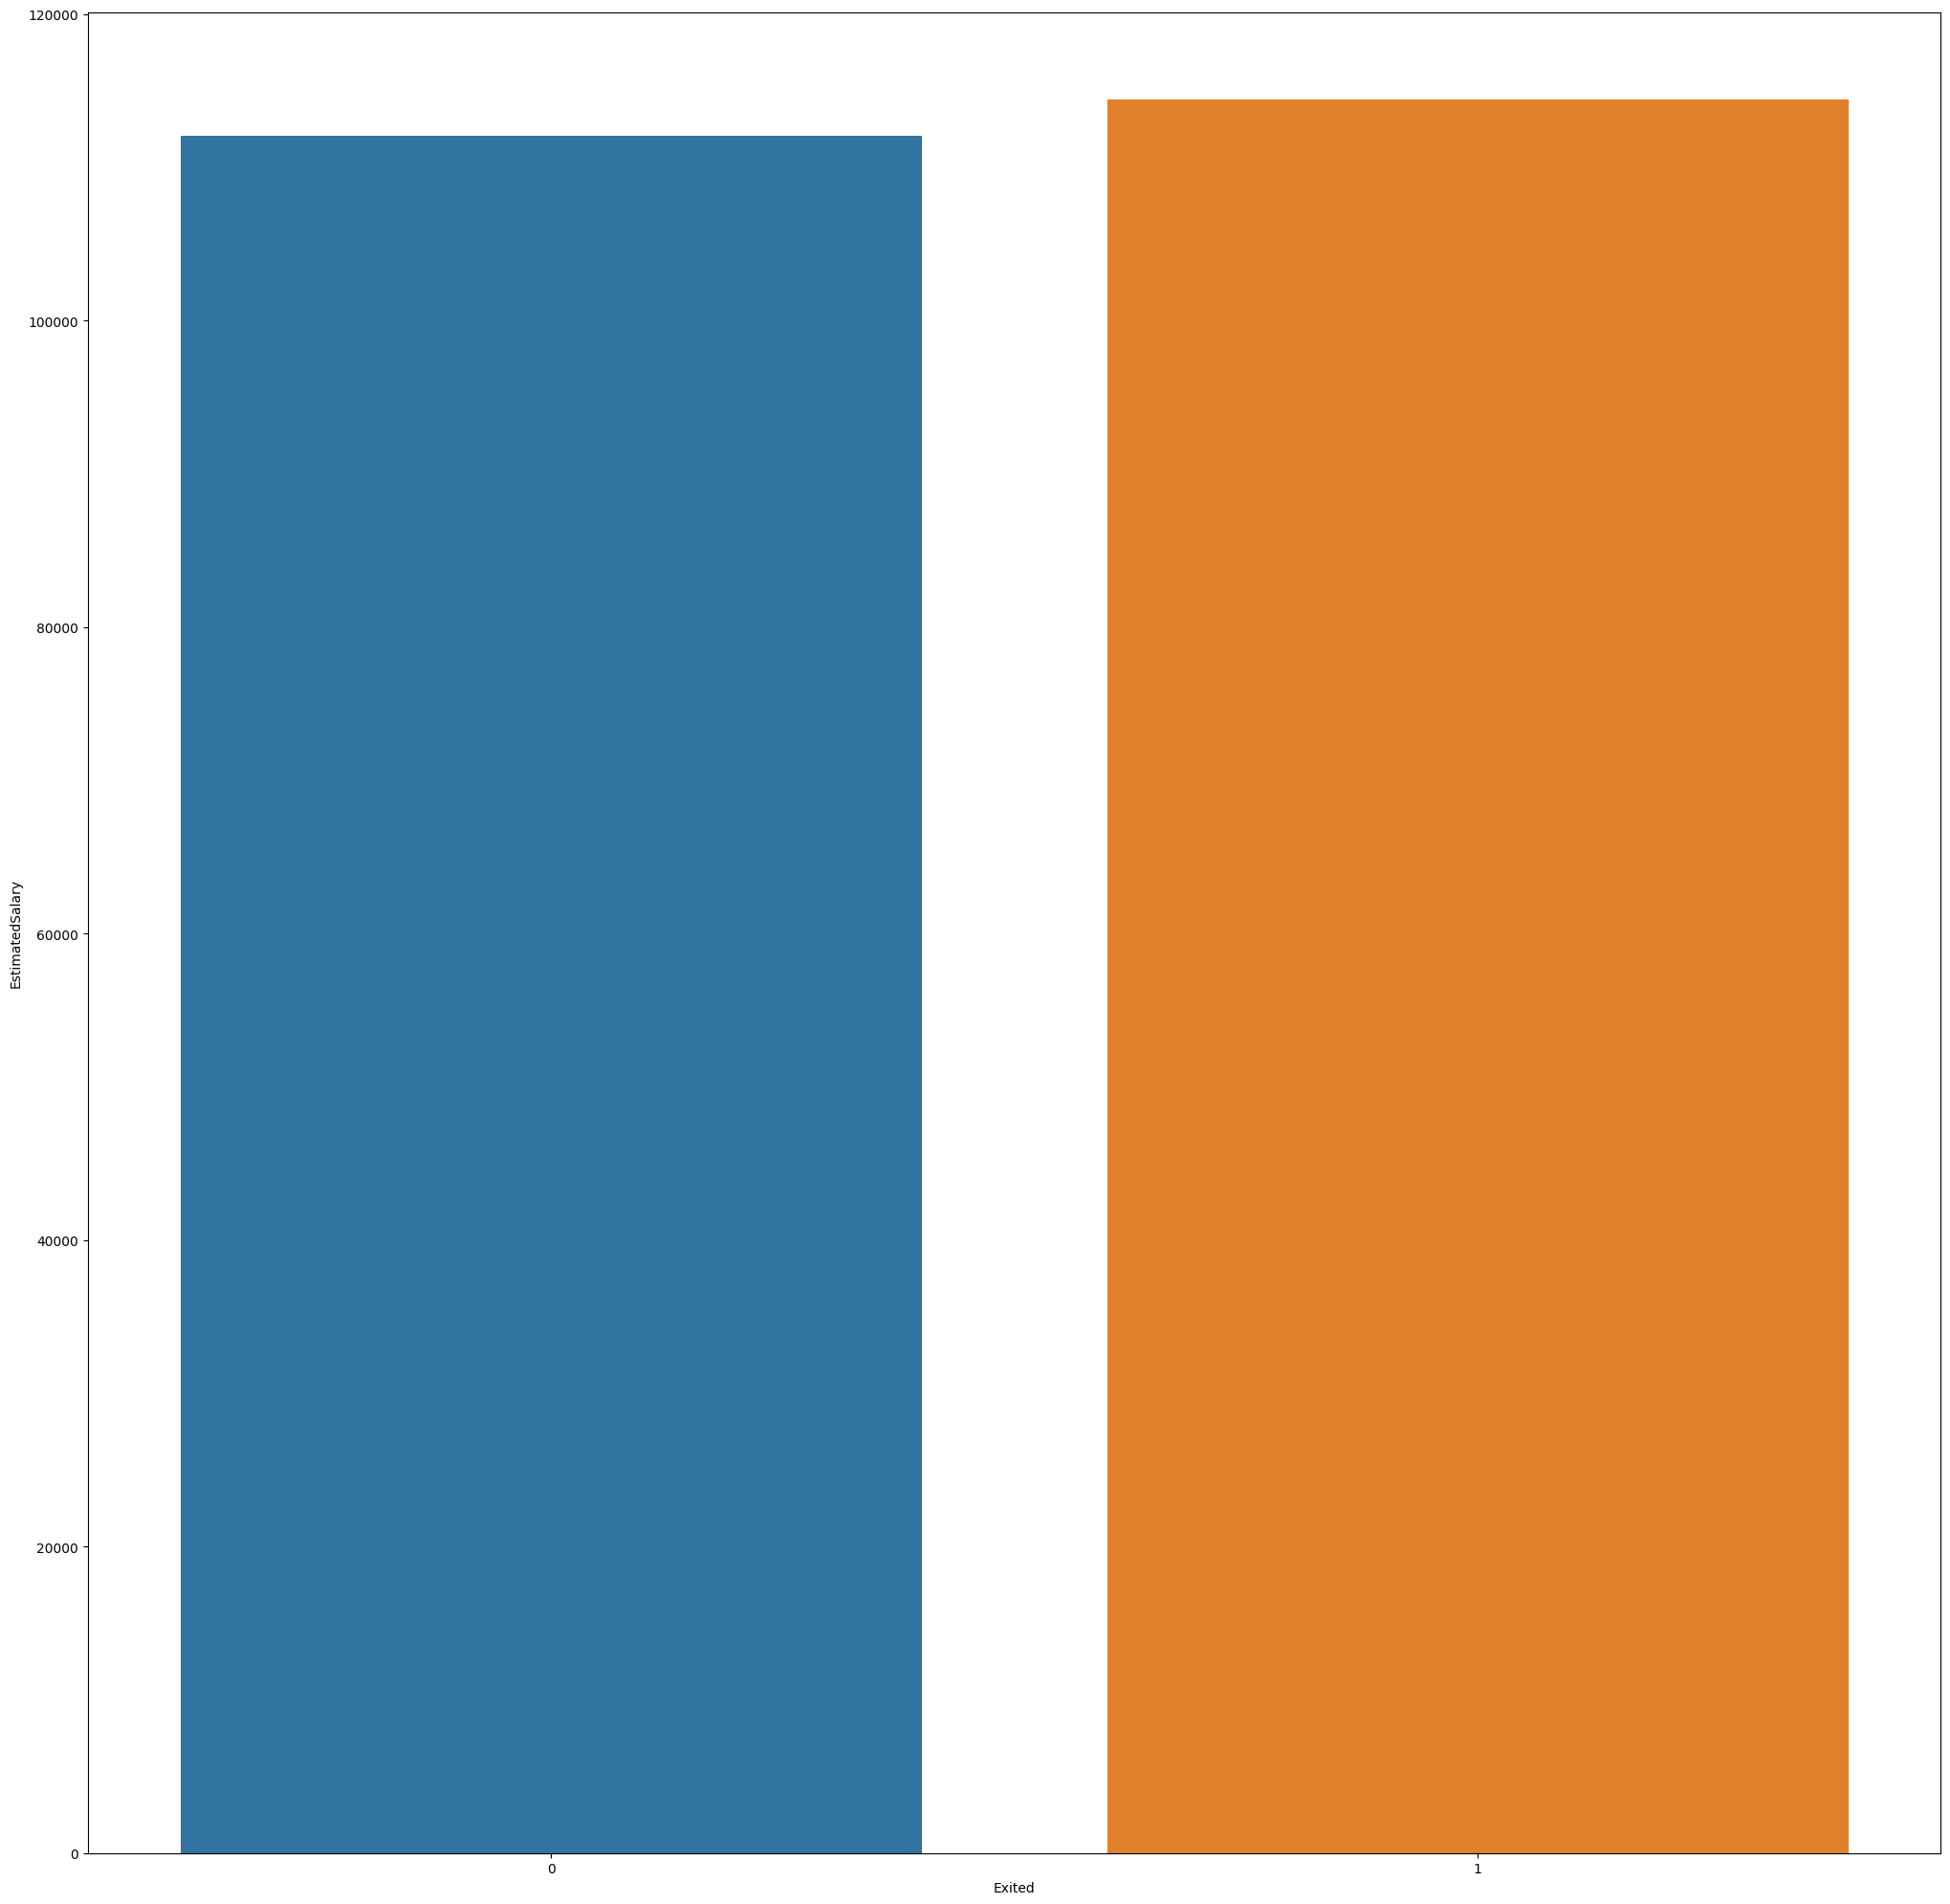

In [23]:
plt.figure(figsize=(25, 25))
sns.barplot(data=salary_exit, x='Exited', y='EstimatedSalary')
plt.show()

In [24]:
exited_asset = bank_account_df.groupby('Exited')['Total_asset'].mean().reset_index()

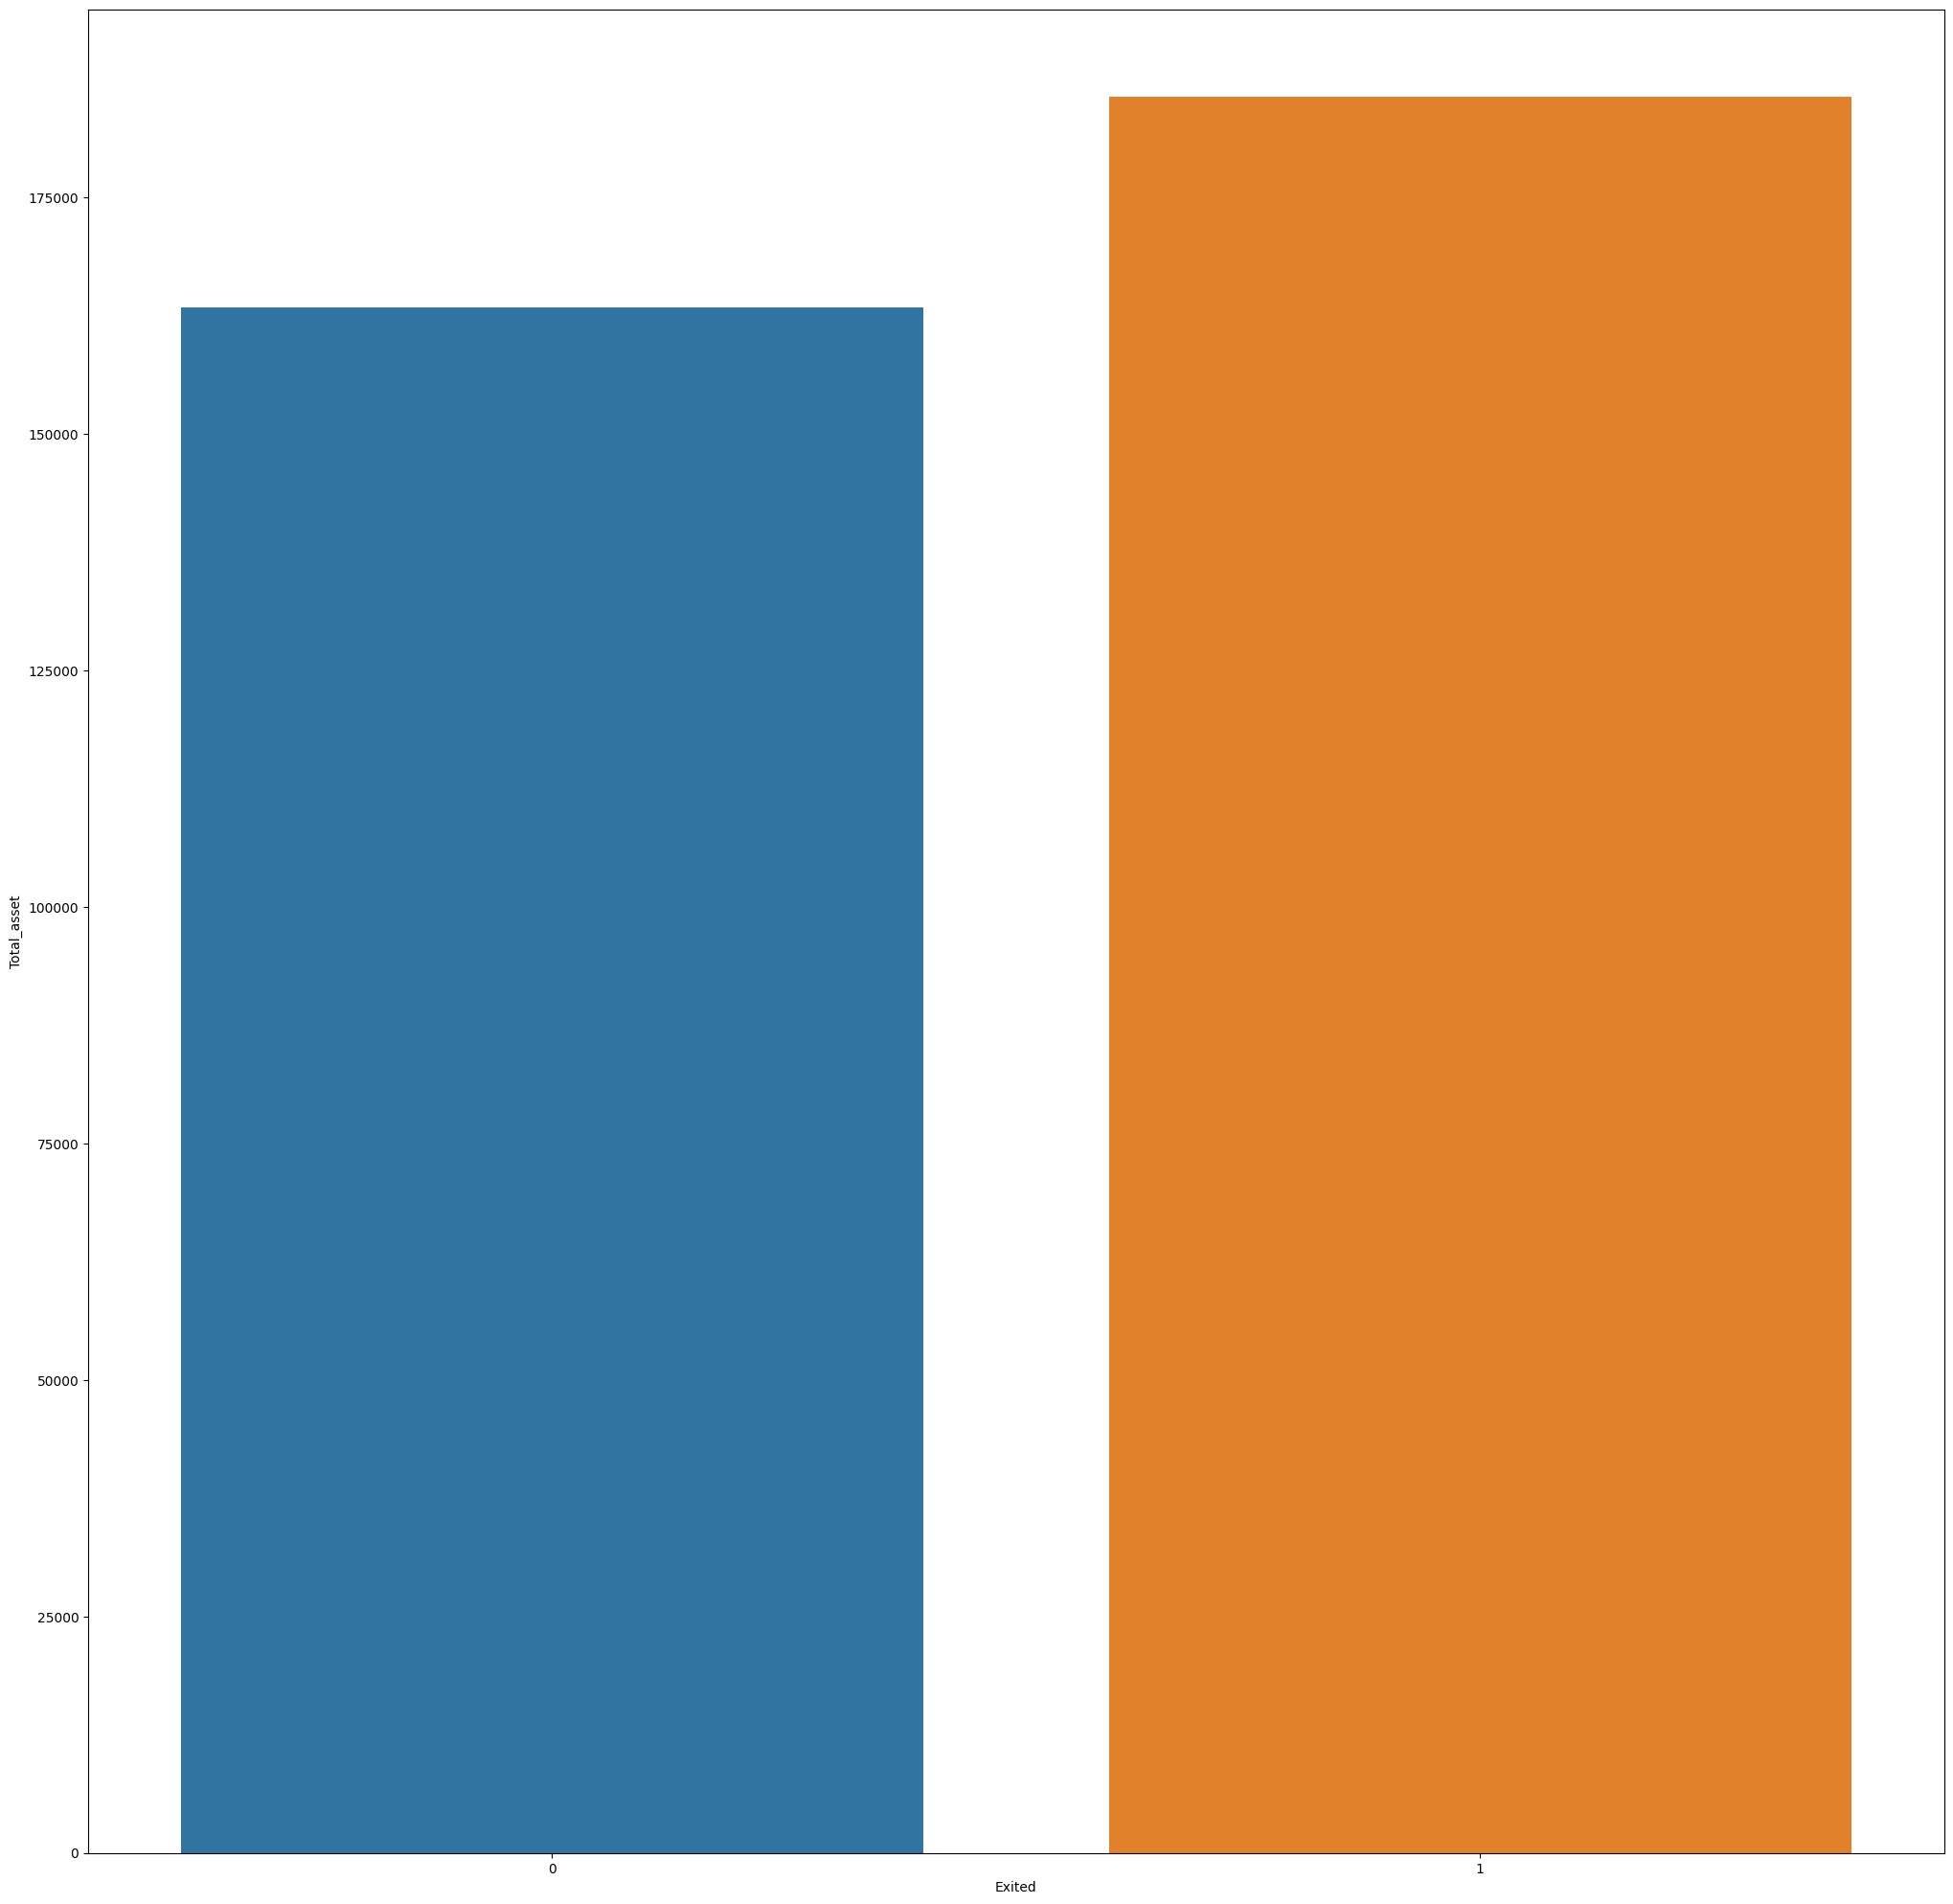

In [25]:
plt.figure(figsize=(25, 25))
sns.barplot(data=exited_asset, x='Exited', y='Total_asset')
plt.show()

In [26]:
country_cust = bank_account_df.groupby('Geography')['Exited'].value_counts().reset_index()

In [27]:
country_cust

,Geography,Exited,count
0,France,0,78643
1,France,1,15572
2,Germany,0,21492
3,Germany,1,13114
4,Spain,0,29978
5,Spain,1,6235


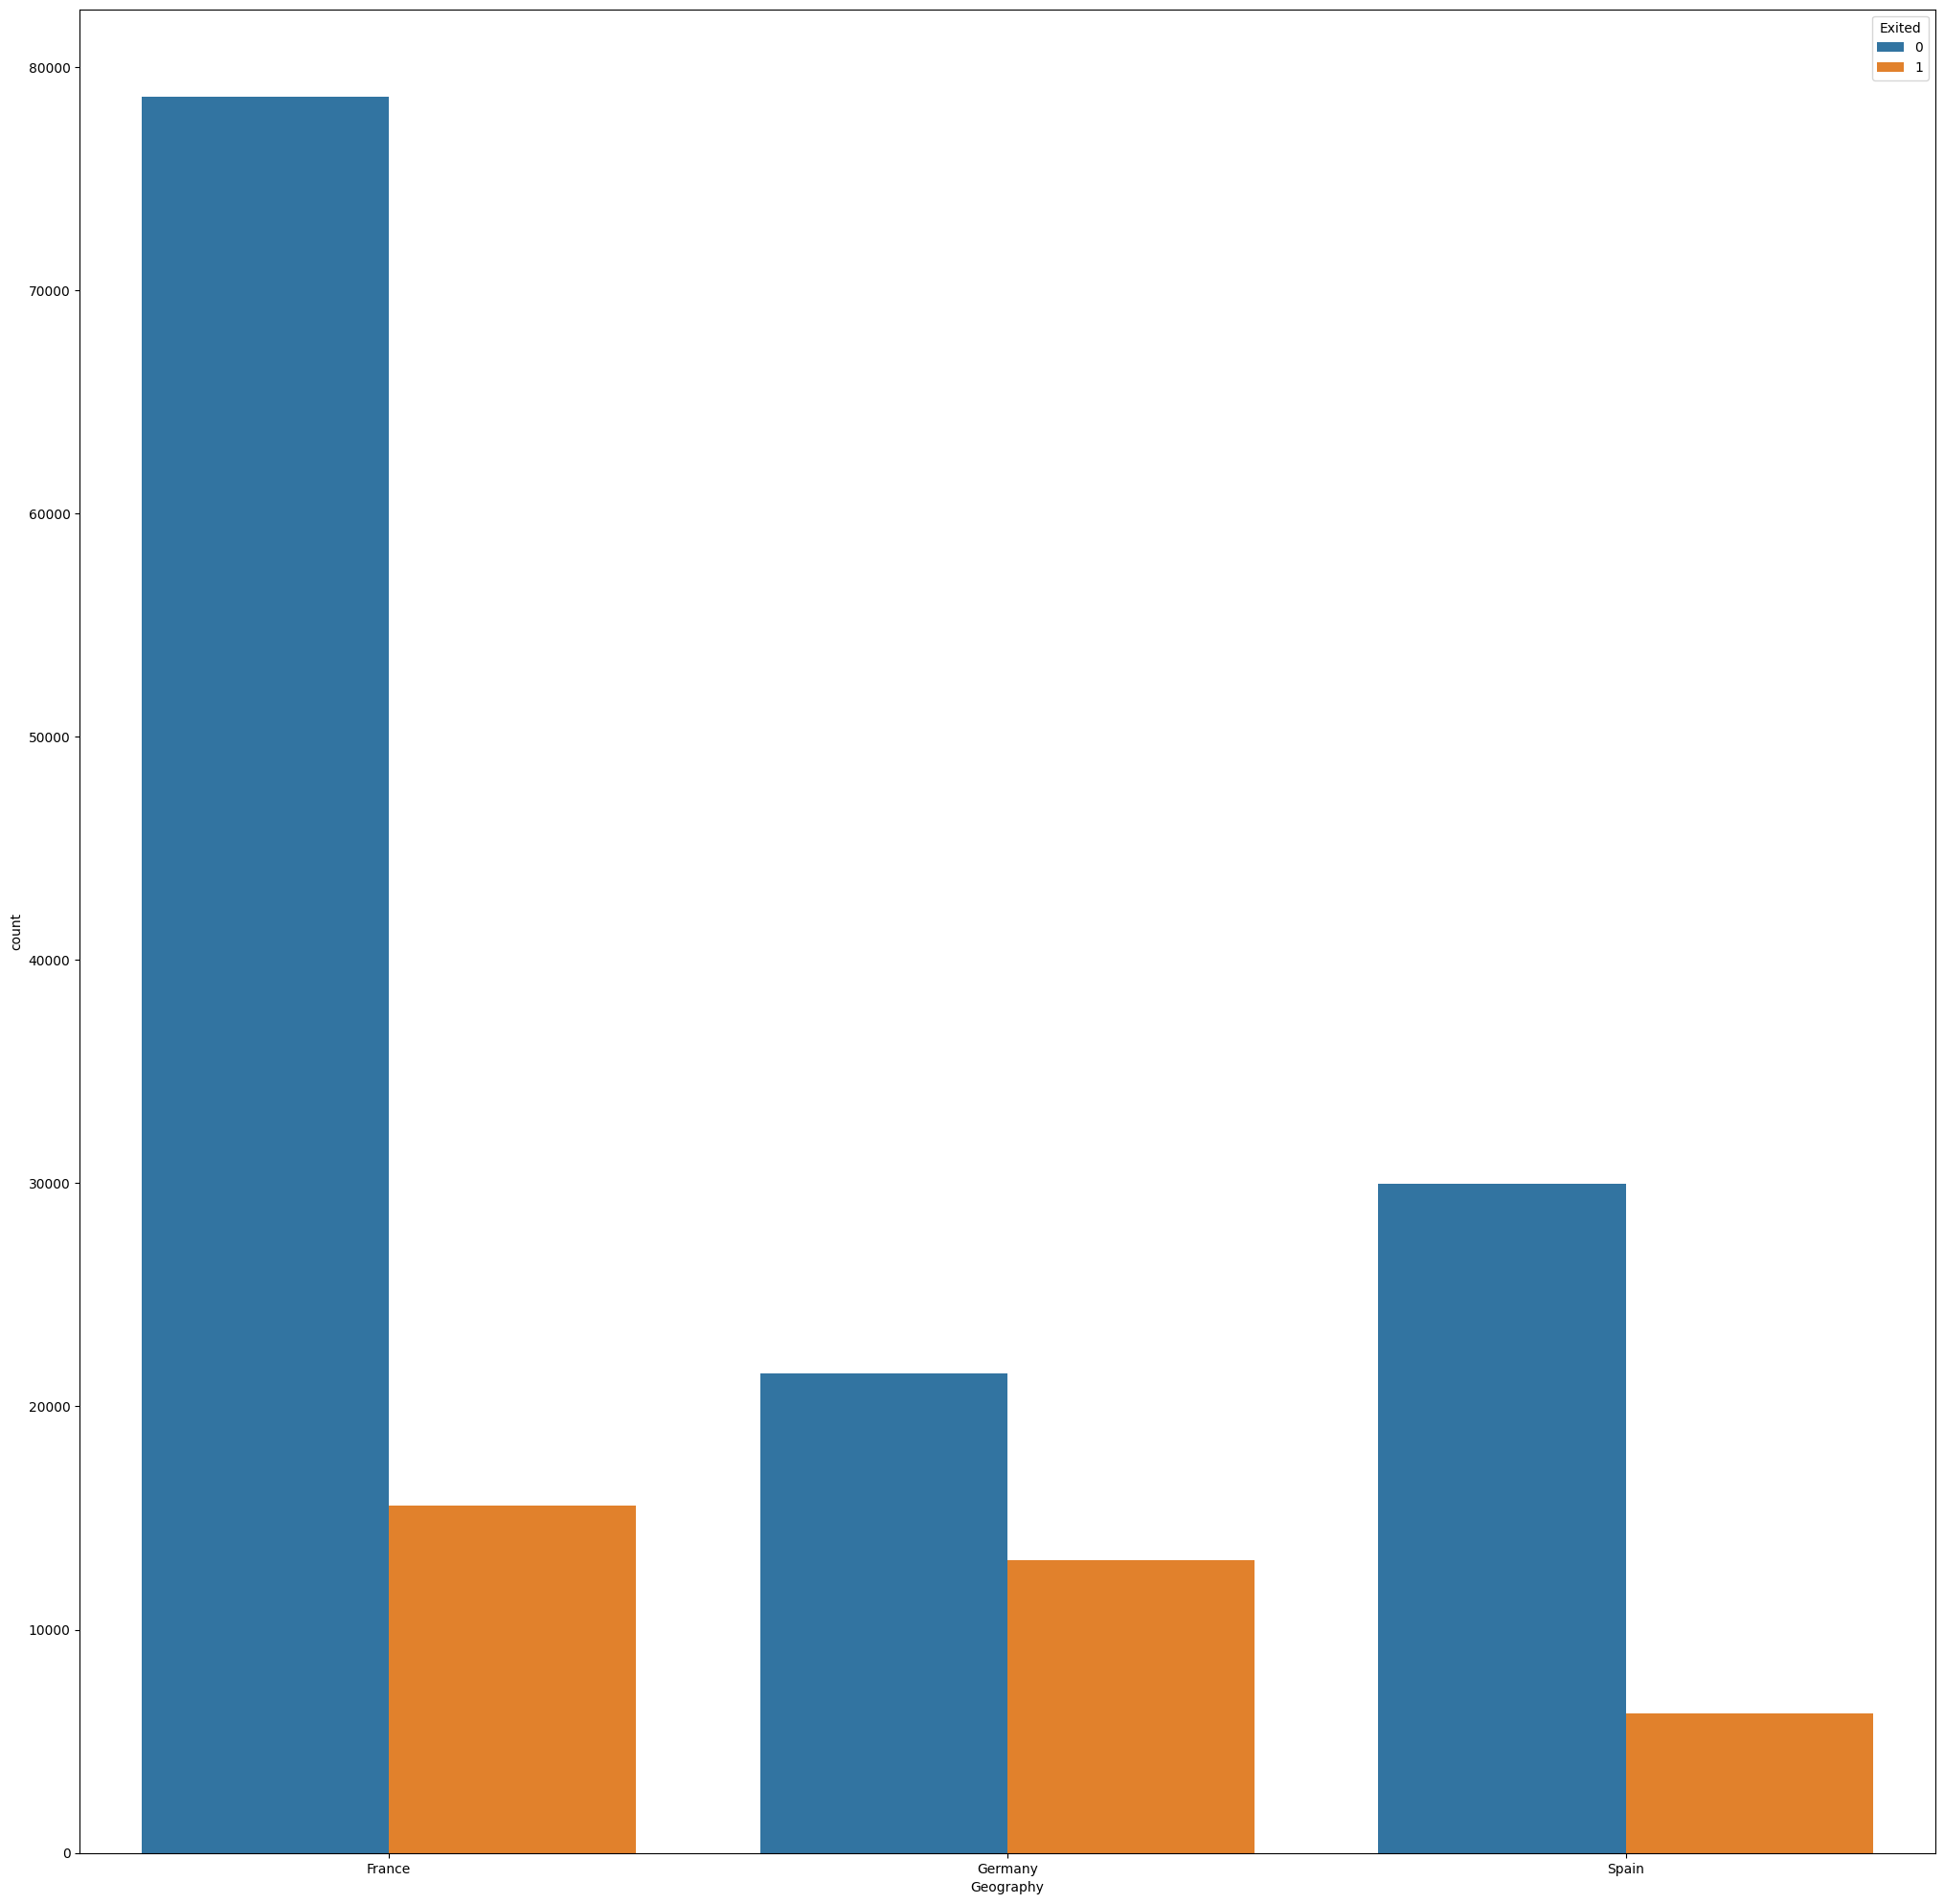

In [28]:
plt.figure(figsize=(25, 25))
sns.barplot(data=country_cust , x='Geography', y='count',hue='Exited')
plt.show()

In [29]:
generation_cust = bank_account_df.groupby(['Generation','Exited'])['Exited'].value_counts().reset_index(name='count')

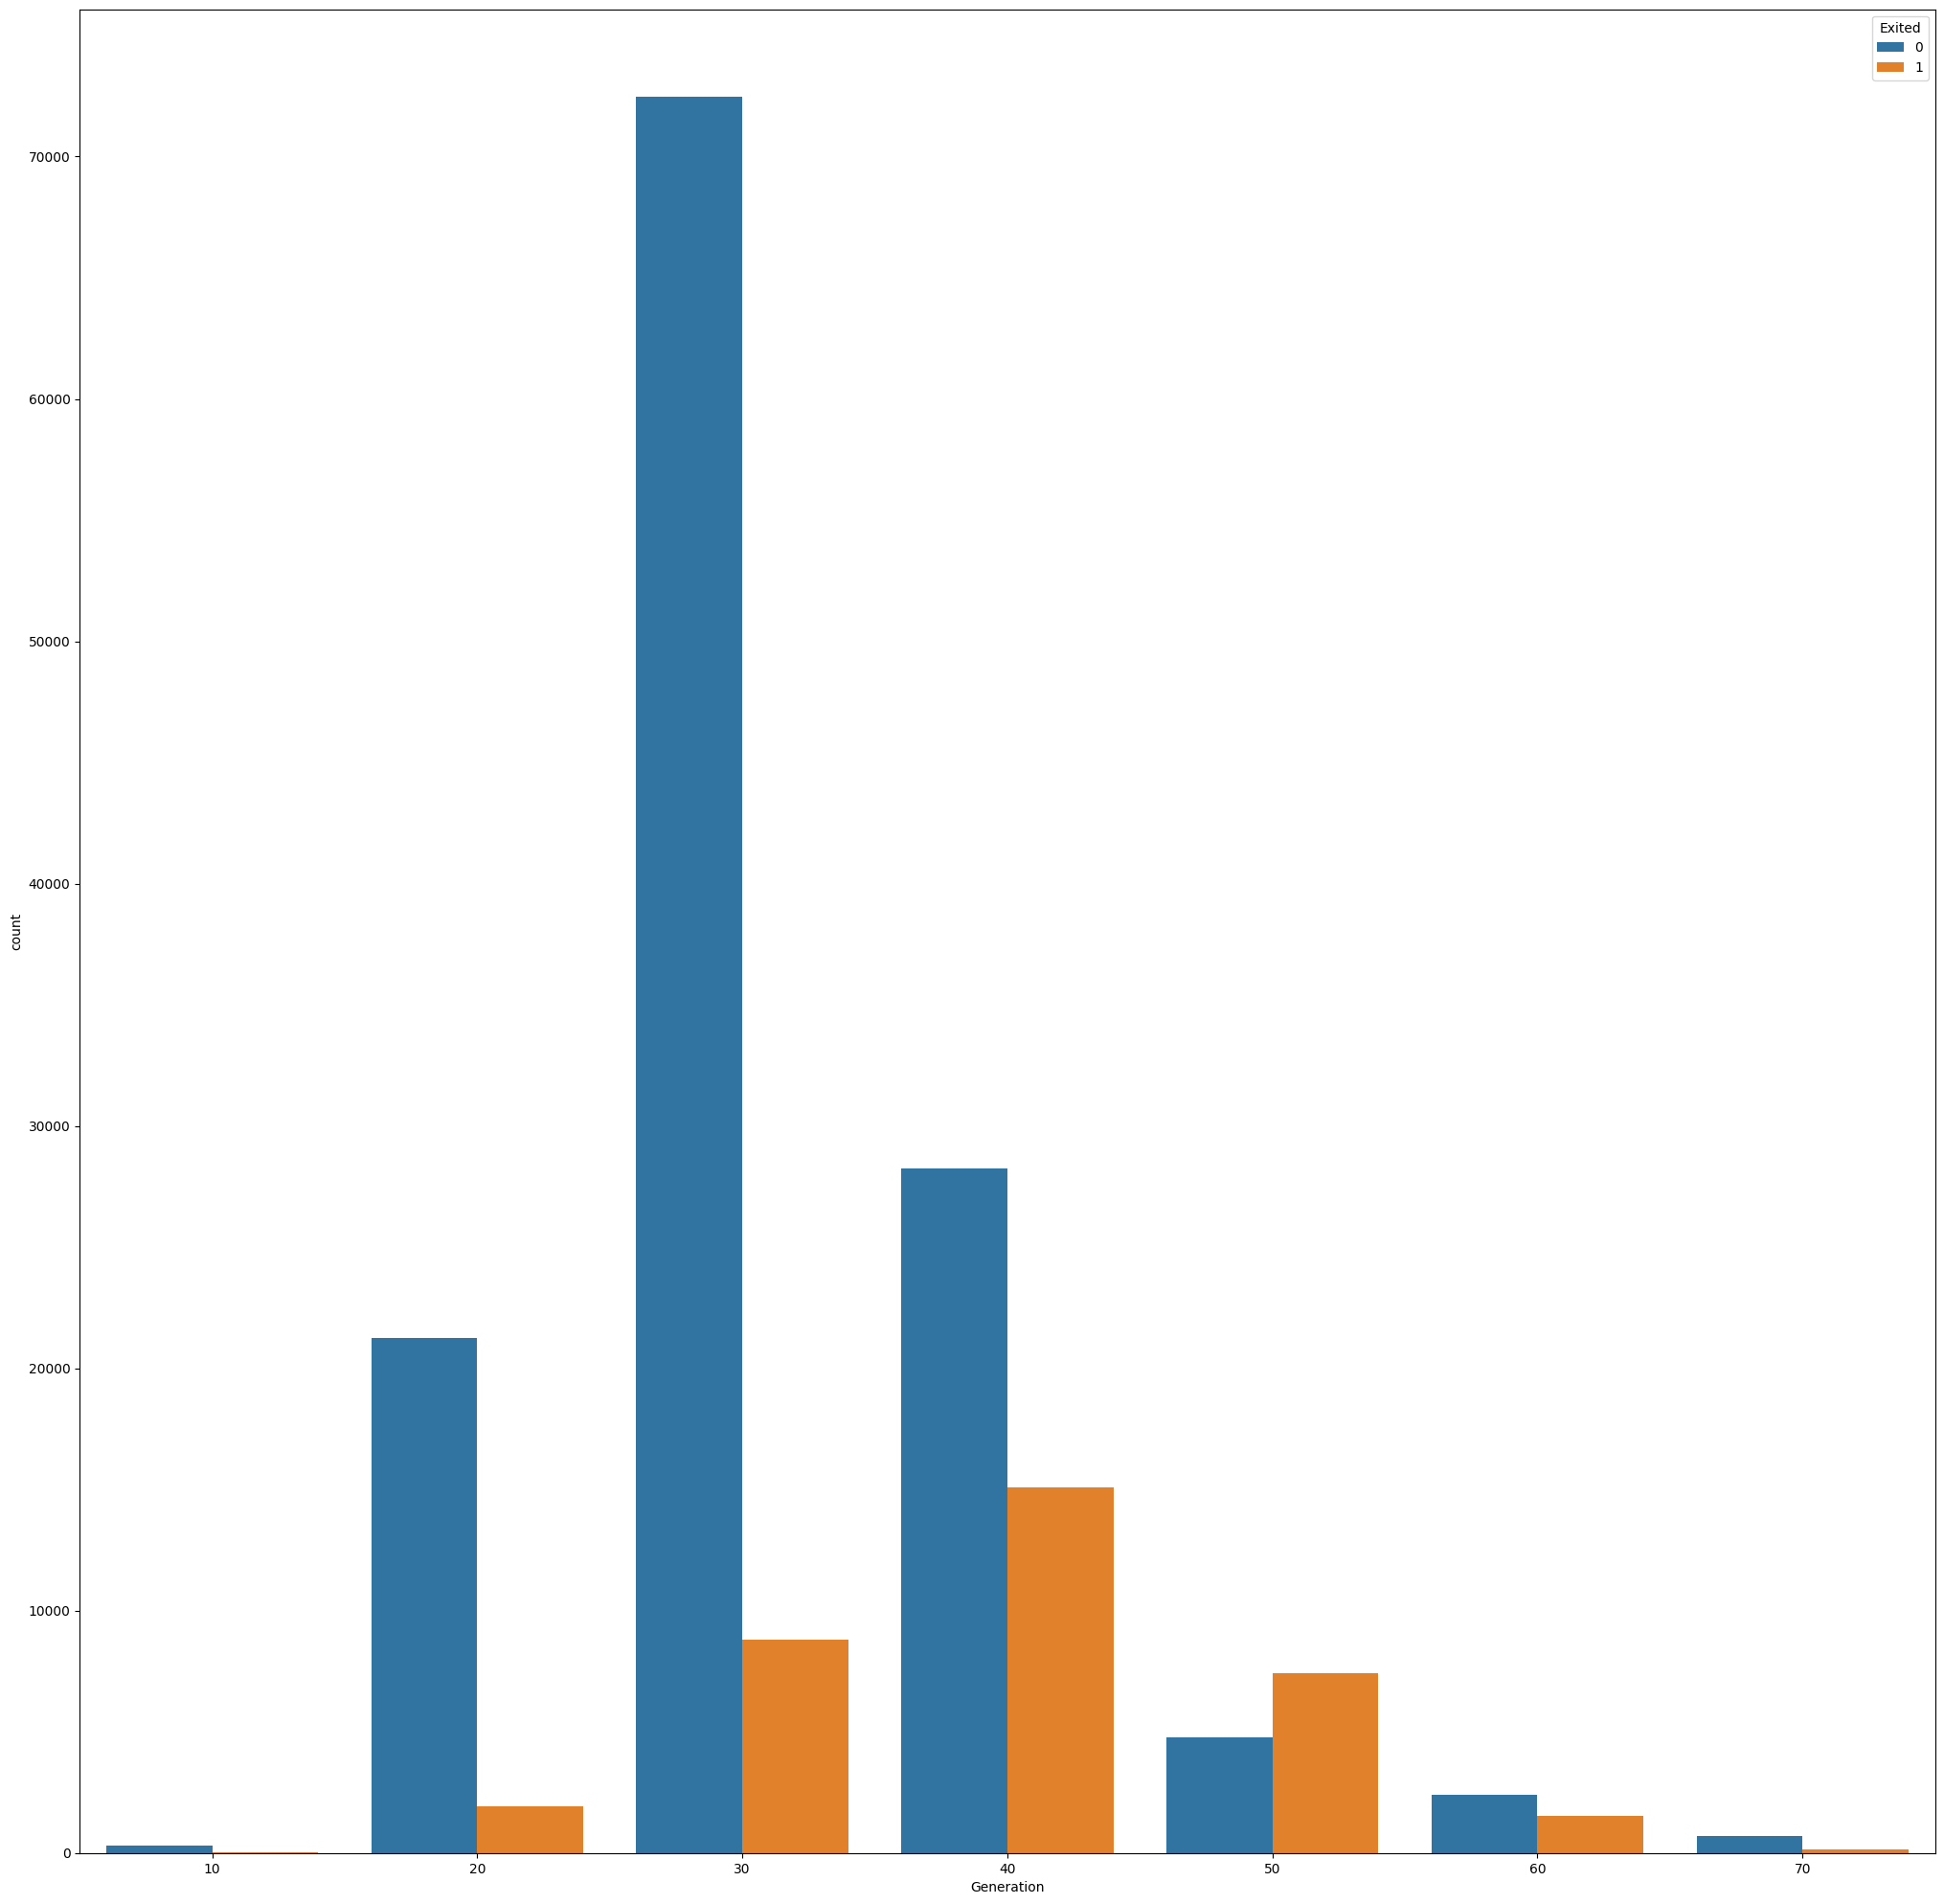

In [30]:
plt.figure(figsize=(25, 25))
sns.barplot(data=generation_cust , x='Generation', y='count',hue='Exited')
plt.show()

In [31]:
credit_exit = bank_account_df.groupby(['Generation','Exited'])['CreditScore'].mean().reset_index()

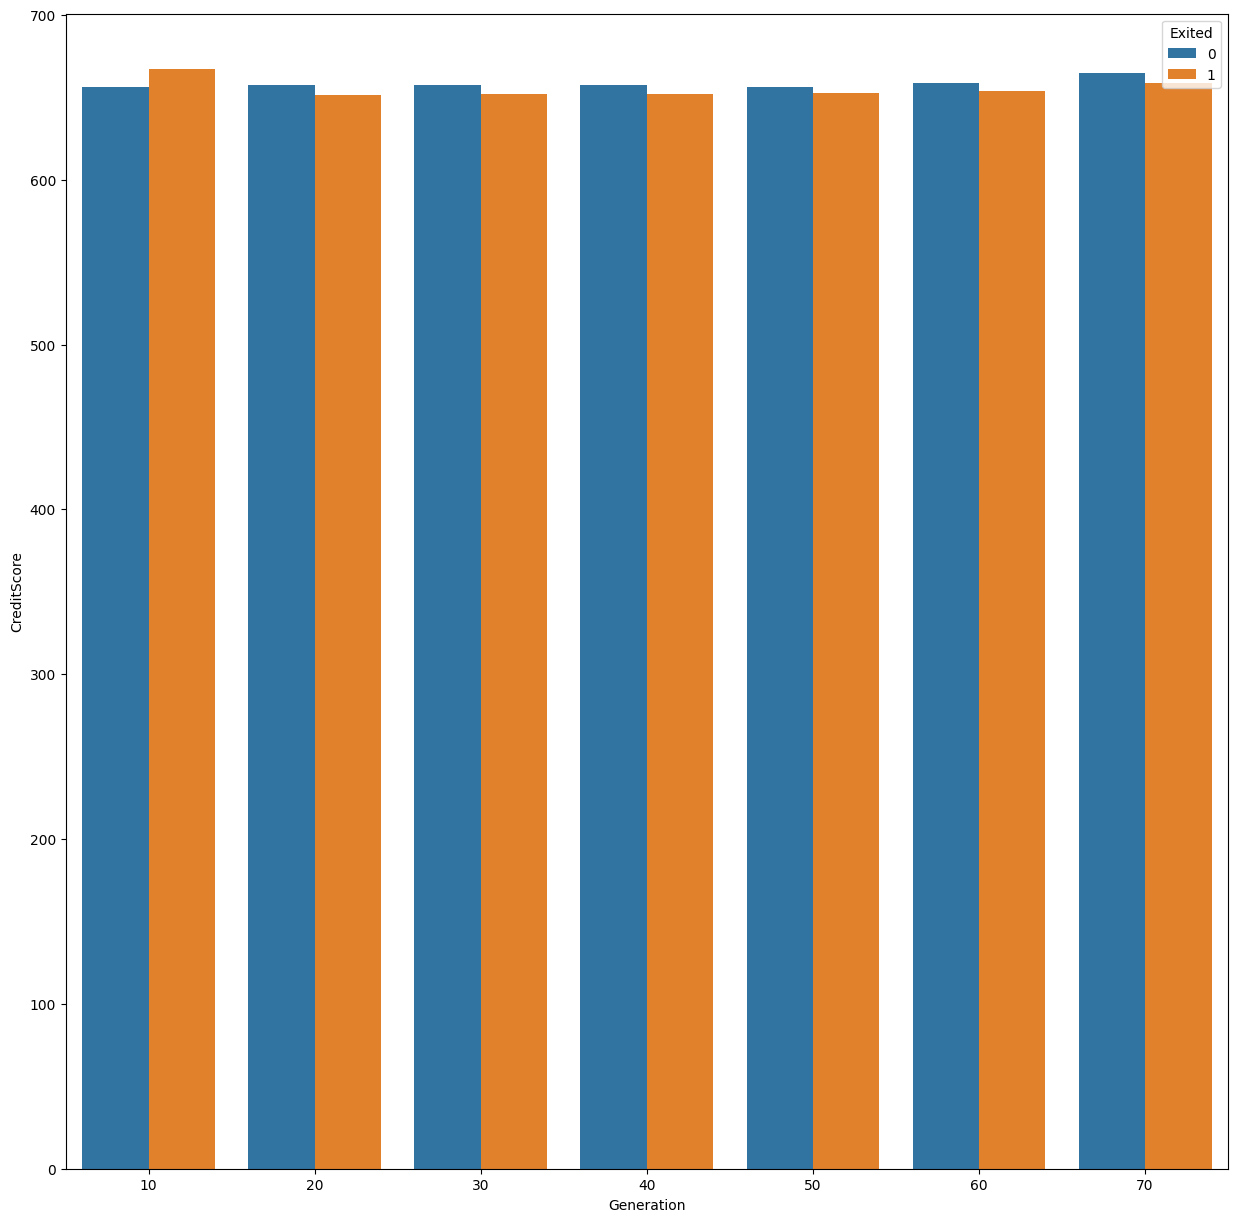

In [32]:
plt.figure(figsize=(15, 15))
sns.barplot(data=credit_exit , x='Generation', y='CreditScore',hue='Exited')
plt.show()

In [33]:
tenure_exit = bank_account_df.groupby('Exited')['Tenure'].mean().reset_index()

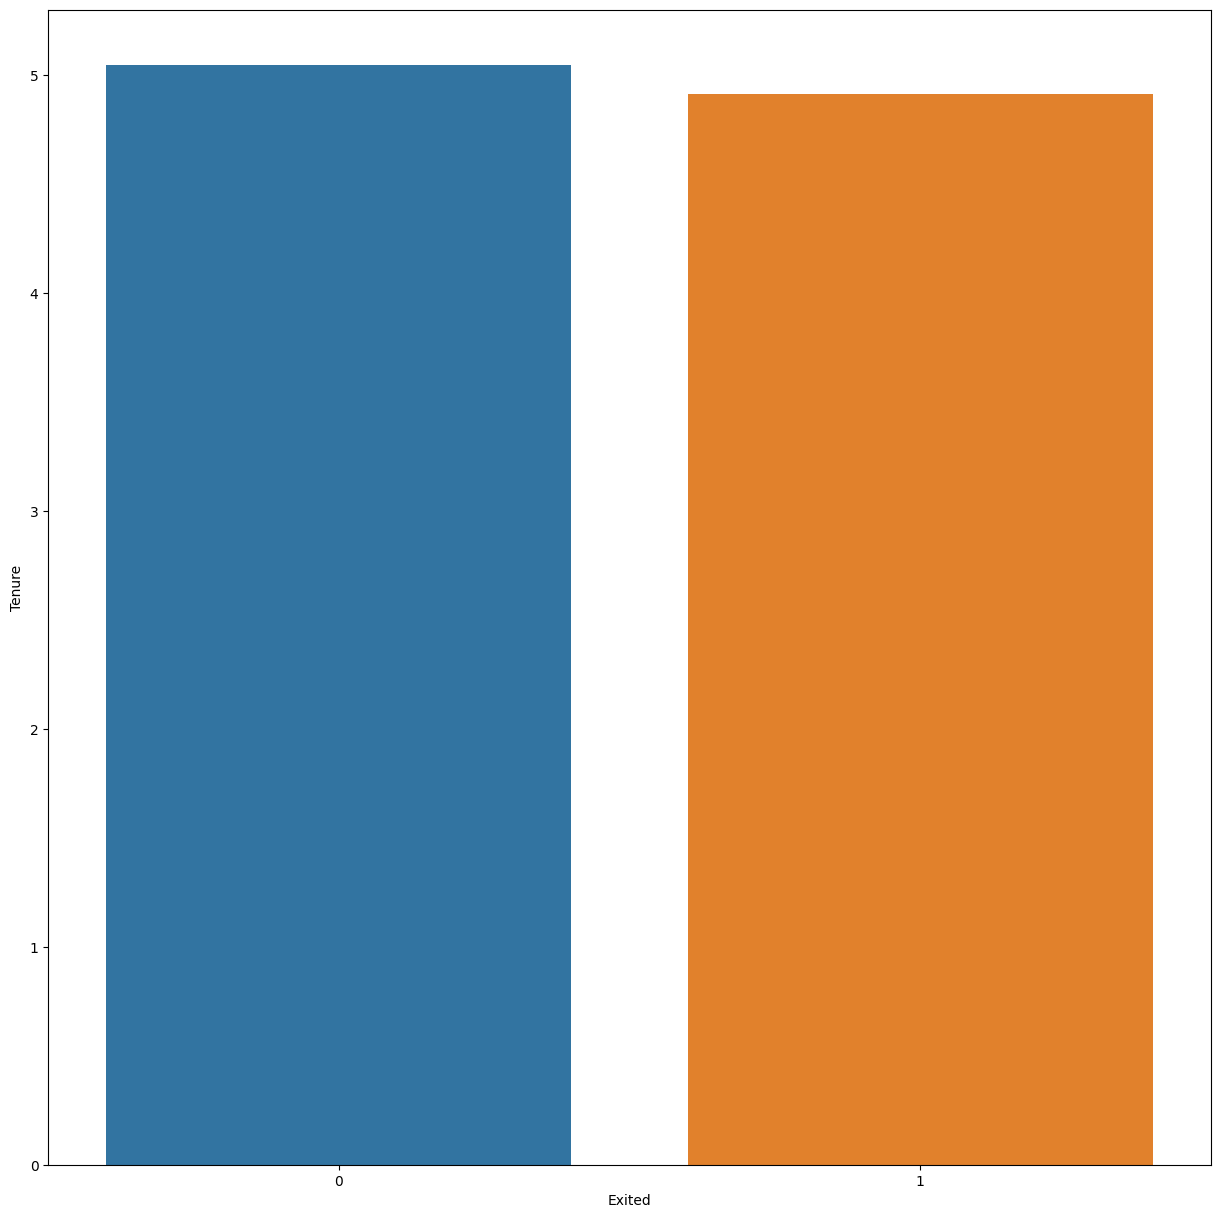

In [34]:
plt.figure(figsize=(15, 15))
sns.barplot(data=tenure_exit , x='Exited', y='Tenure')
plt.show()

In [35]:
tenure_gen__exit = bank_account_df.groupby(['Generation','Exited'])['Tenure'].mean().reset_index()

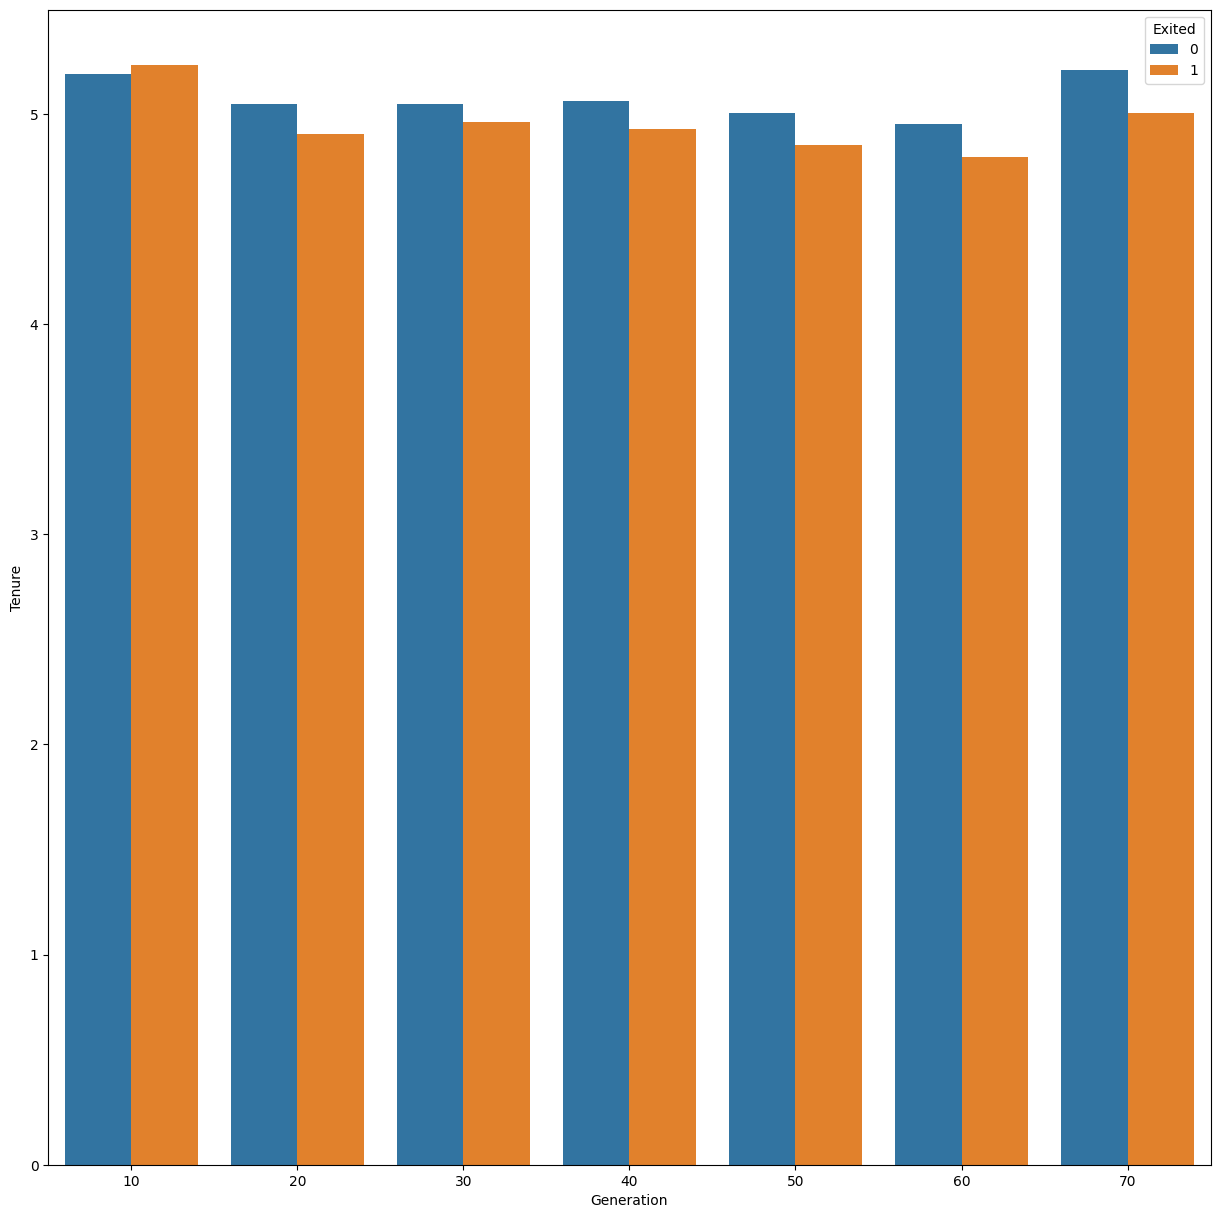

In [36]:
plt.figure(figsize=(15, 15))
sns.barplot(data=tenure_gen__exit , x='Generation', y='Tenure',hue='Exited')
plt.show()

In [37]:
product__exit = bank_account_df.groupby(['NumOfProducts','Exited'])['Exited'].value_counts().reset_index(name='count')

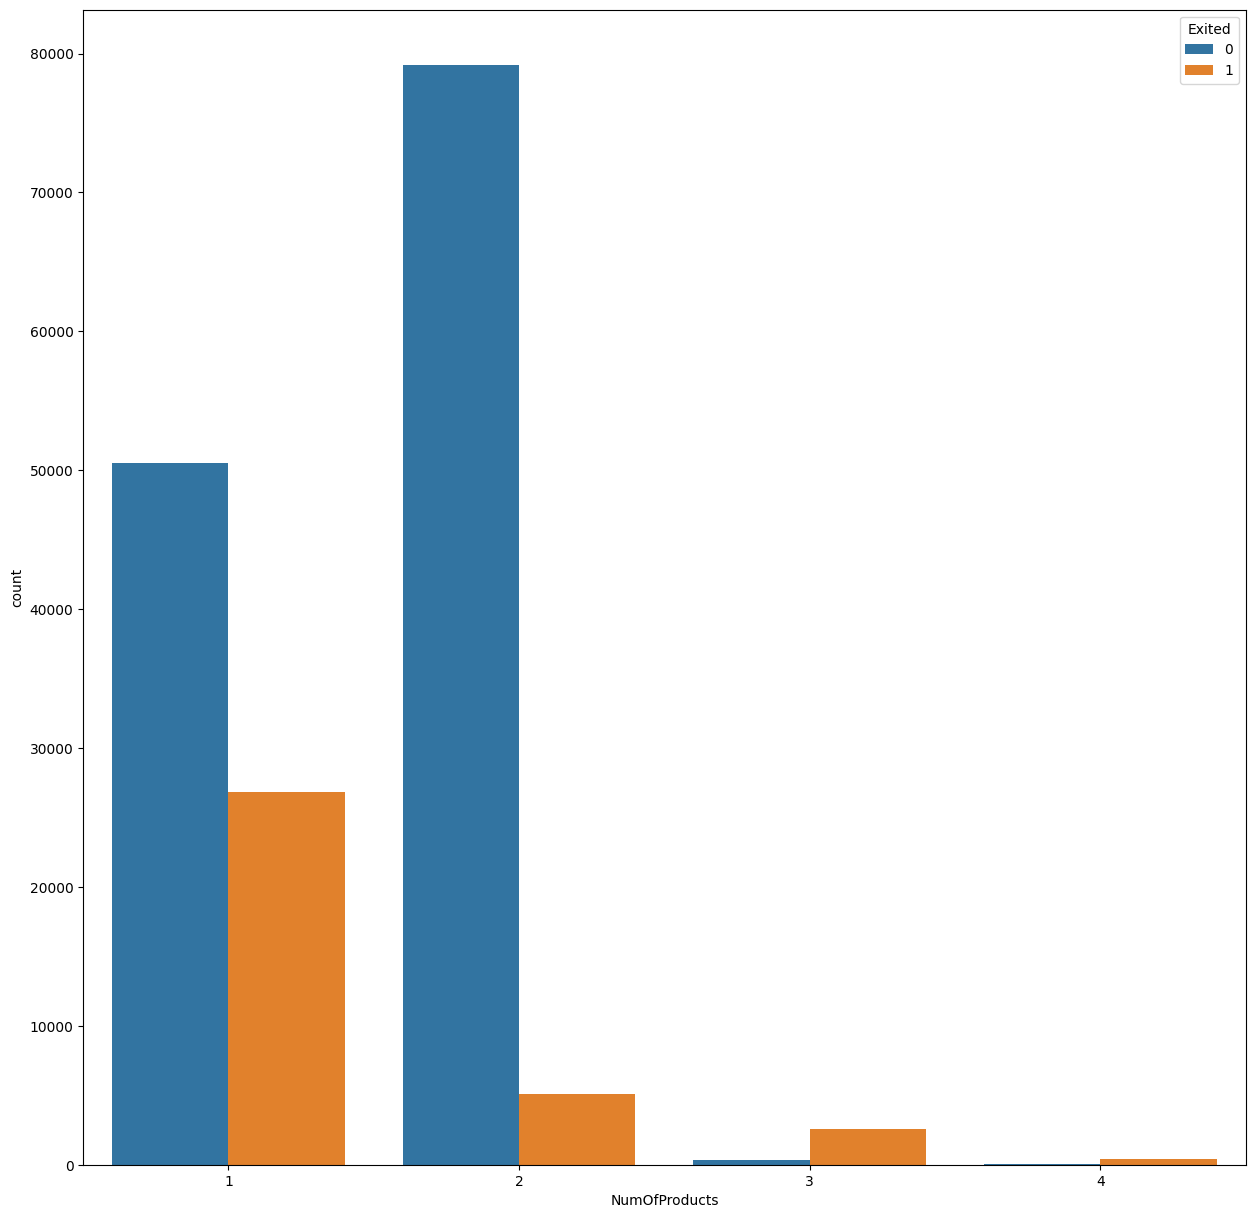

In [38]:
plt.figure(figsize=(15, 15))
sns.barplot(data=product__exit , x='NumOfProducts', y='count',hue='Exited')
plt.show()

In [39]:
total_asset = bank_account_df.groupby(['Tenure','Exited'])['Total_asset'].mean().reset_index()

<Axes: xlabel='Tenure', ylabel='Total_asset'>

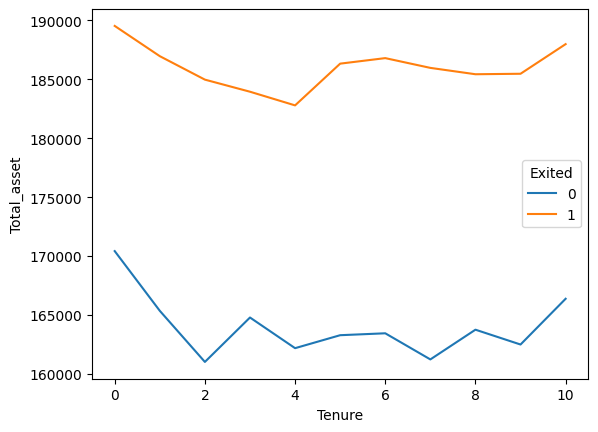

In [40]:
sns.lineplot(x='Tenure',y='Total_asset',hue='Exited',data=total_asset)

In [41]:
card = bank_account_df.groupby(['HasCrCard','Exited'])['Exited'].value_counts().reset_index(name = 'count')

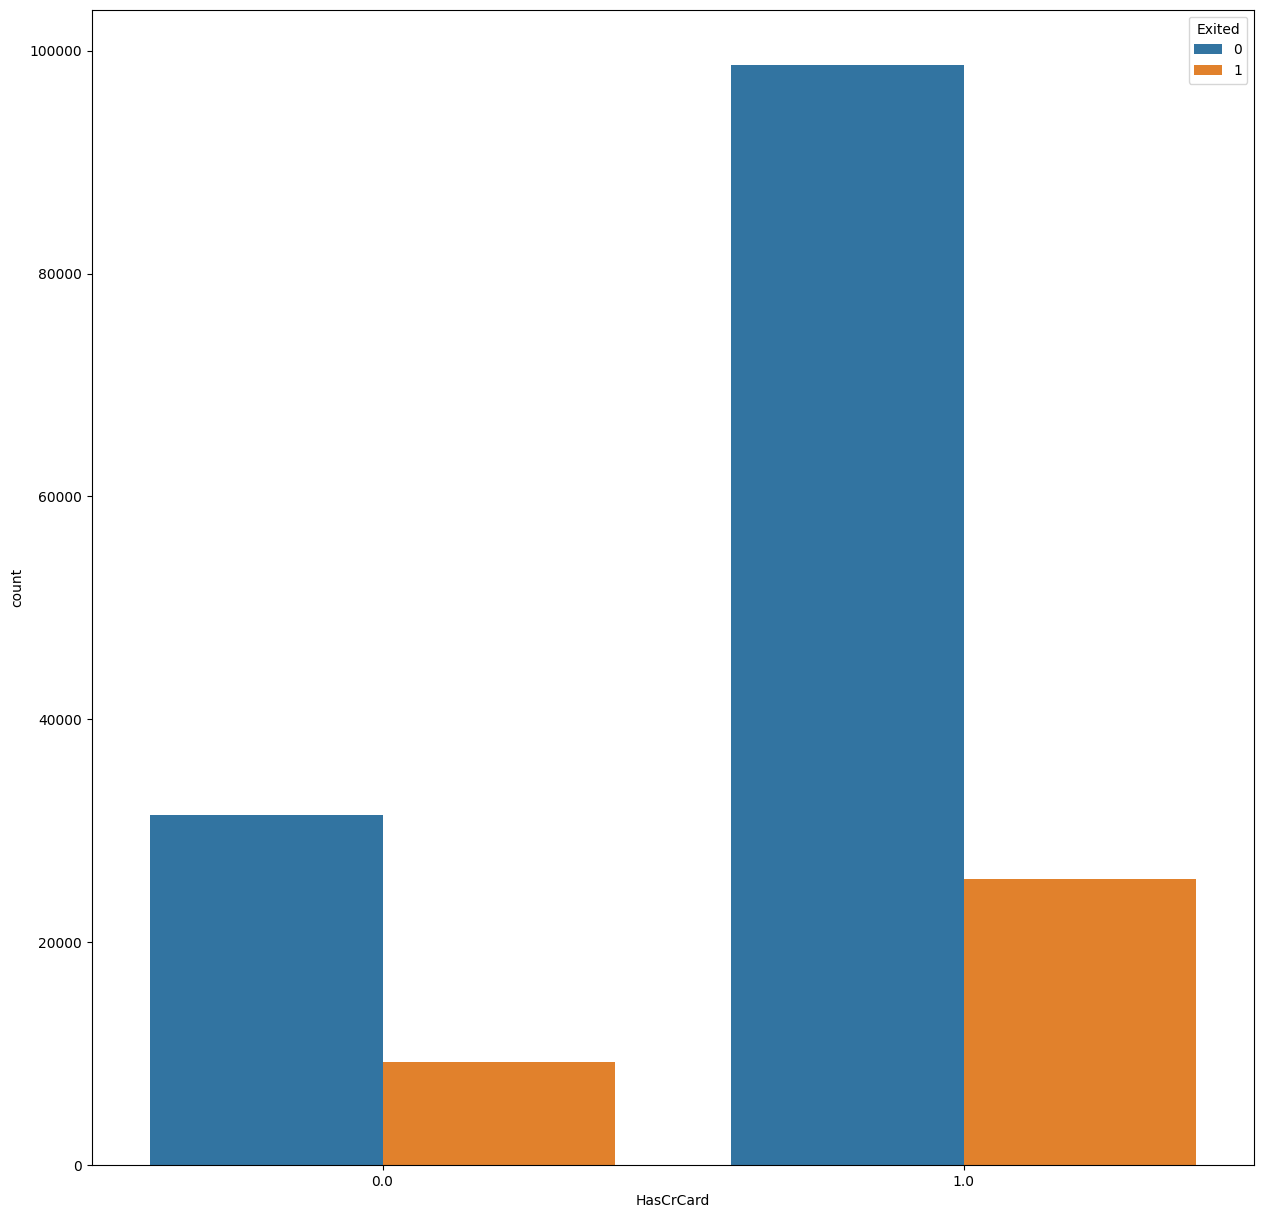

In [42]:
plt.figure(figsize=(15, 15))
sns.barplot(data=card , x='HasCrCard', y='count',hue='Exited')
plt.show()

In [43]:
active = bank_account_df.groupby(['IsActiveMember','Exited'])['Exited'].value_counts().reset_index(name = 'count')

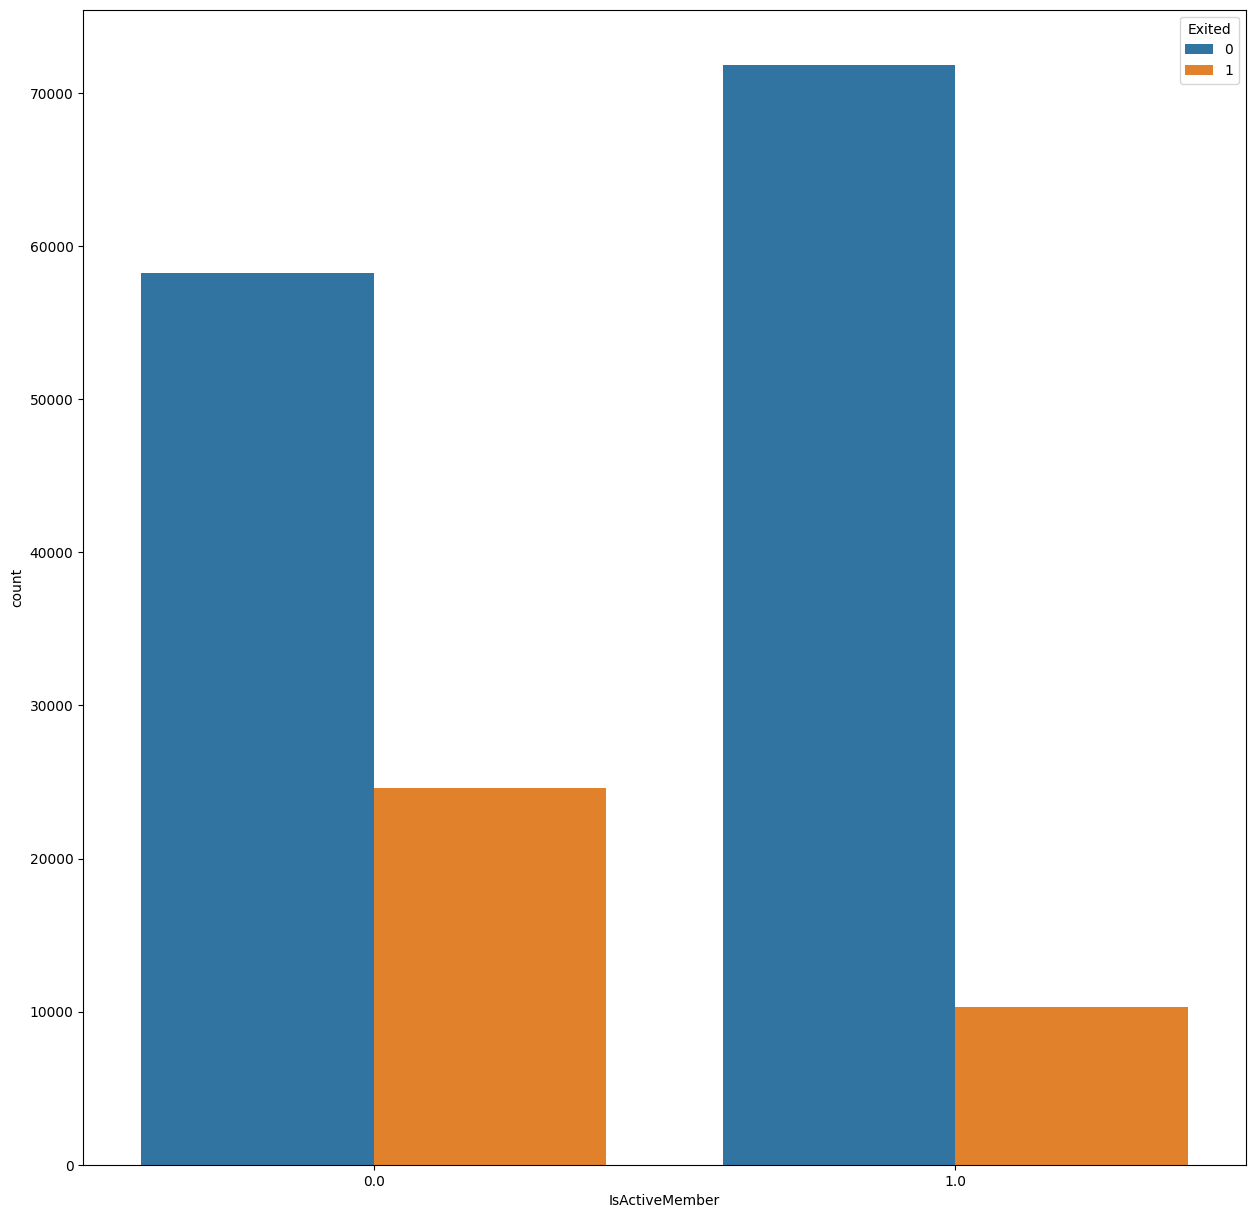

In [44]:
plt.figure(figsize=(15, 15))
sns.barplot(data=active , x='IsActiveMember', y='count',hue='Exited')
plt.show()

In [45]:
exited=bank_account_df.loc[bank_account_df['Exited']==1]

In [46]:
exited

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Generation,Balance_vs_Salary,Total_asset
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1,30,0.968787,267802.89
18,18,15671358,Hargreaves,645,Germany,Female,55.0,8,120105.43,1,1.0,0.0,125083.29,1,50,0.960204,245188.72
19,19,15650670,Ts'ui,559,France,Male,61.0,1,153711.26,1,0.0,1.0,180890.40,1,60,0.849748,334601.66
23,23,15576044,Akabueze,554,Germany,Male,44.0,9,121823.26,1,1.0,0.0,79577.68,1,40,1.530872,201400.94
25,25,15671137,Sazonova,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1,30,0.000000,131363.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165007,165007,15674851,Gaffney,767,France,Male,38.0,3,0.00,1,1.0,0.0,152872.84,1,30,0.000000,152872.84
165012,165012,15815050,Trevisani,746,Germany,Female,60.0,3,108805.42,2,1.0,0.0,78744.37,1,60,1.381755,187549.79
165022,165022,15798960,Hao,577,France,Female,45.0,2,0.00,1,0.0,0.0,148811.14,1,40,0.000000,148811.14
165024,165024,15734886,Martin,592,Germany,Female,33.0,3,110993.29,2,1.0,1.0,176747.66,1,30,0.627976,287740.95


In [47]:
exited_num_products= exited.groupby(['NumOfProducts','HasCrCard'])['Exited'].count().reset_index()

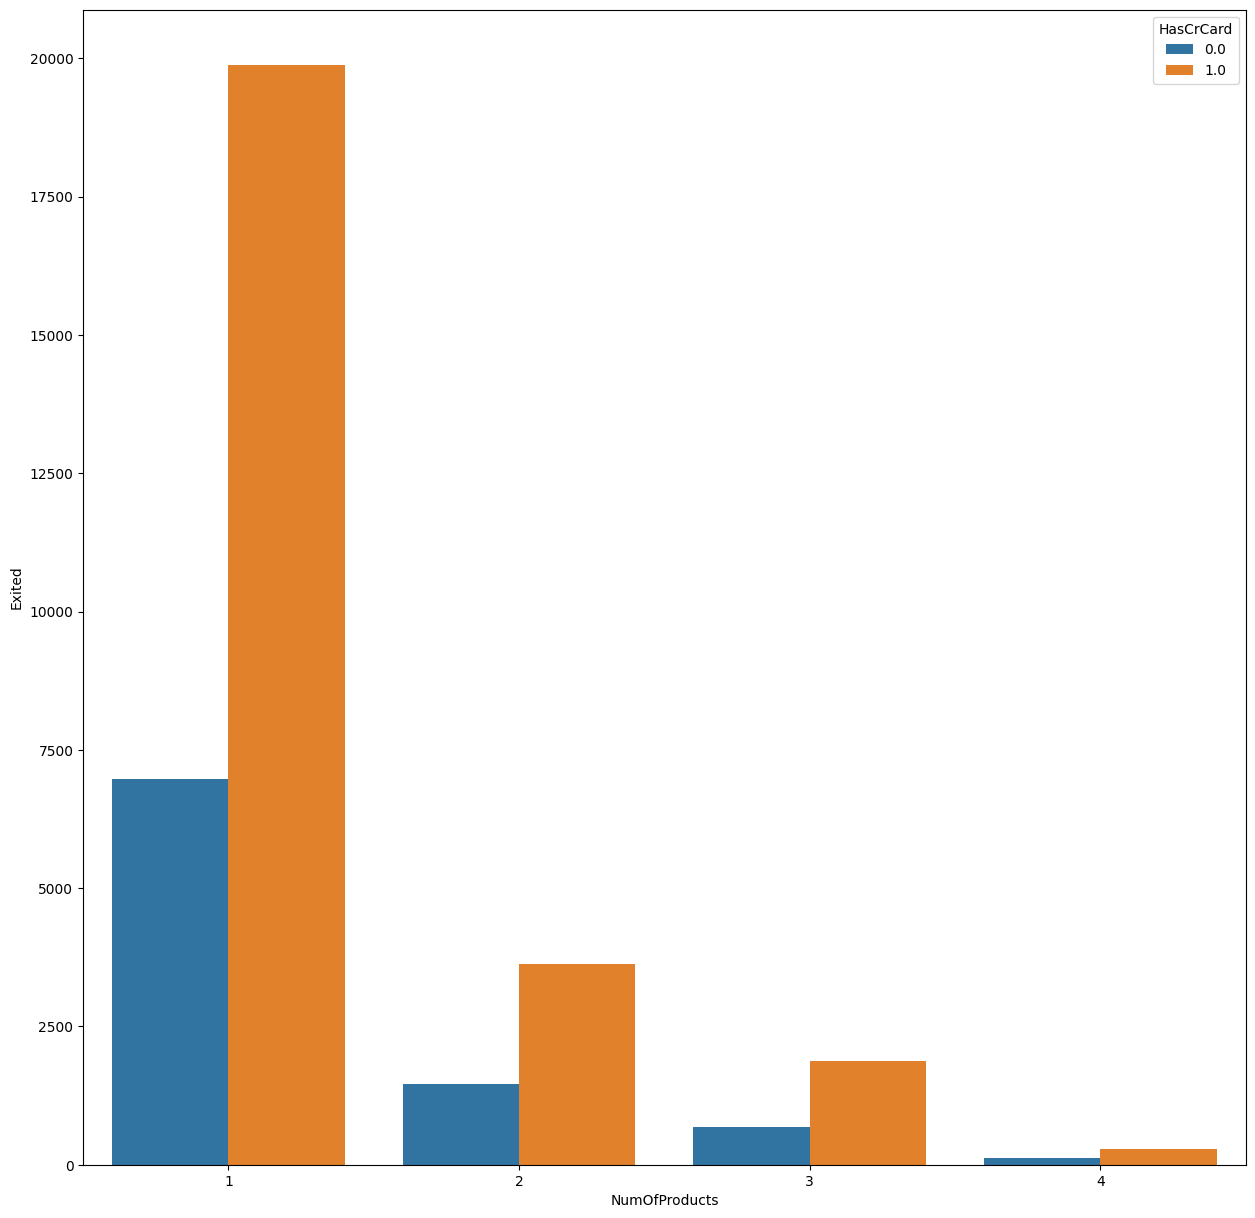

In [48]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_num_products , x='NumOfProducts', y='Exited',hue='HasCrCard')
plt.show()

In [49]:
exited_country_asset= exited.groupby('Geography')['Balance'].mean().reset_index()

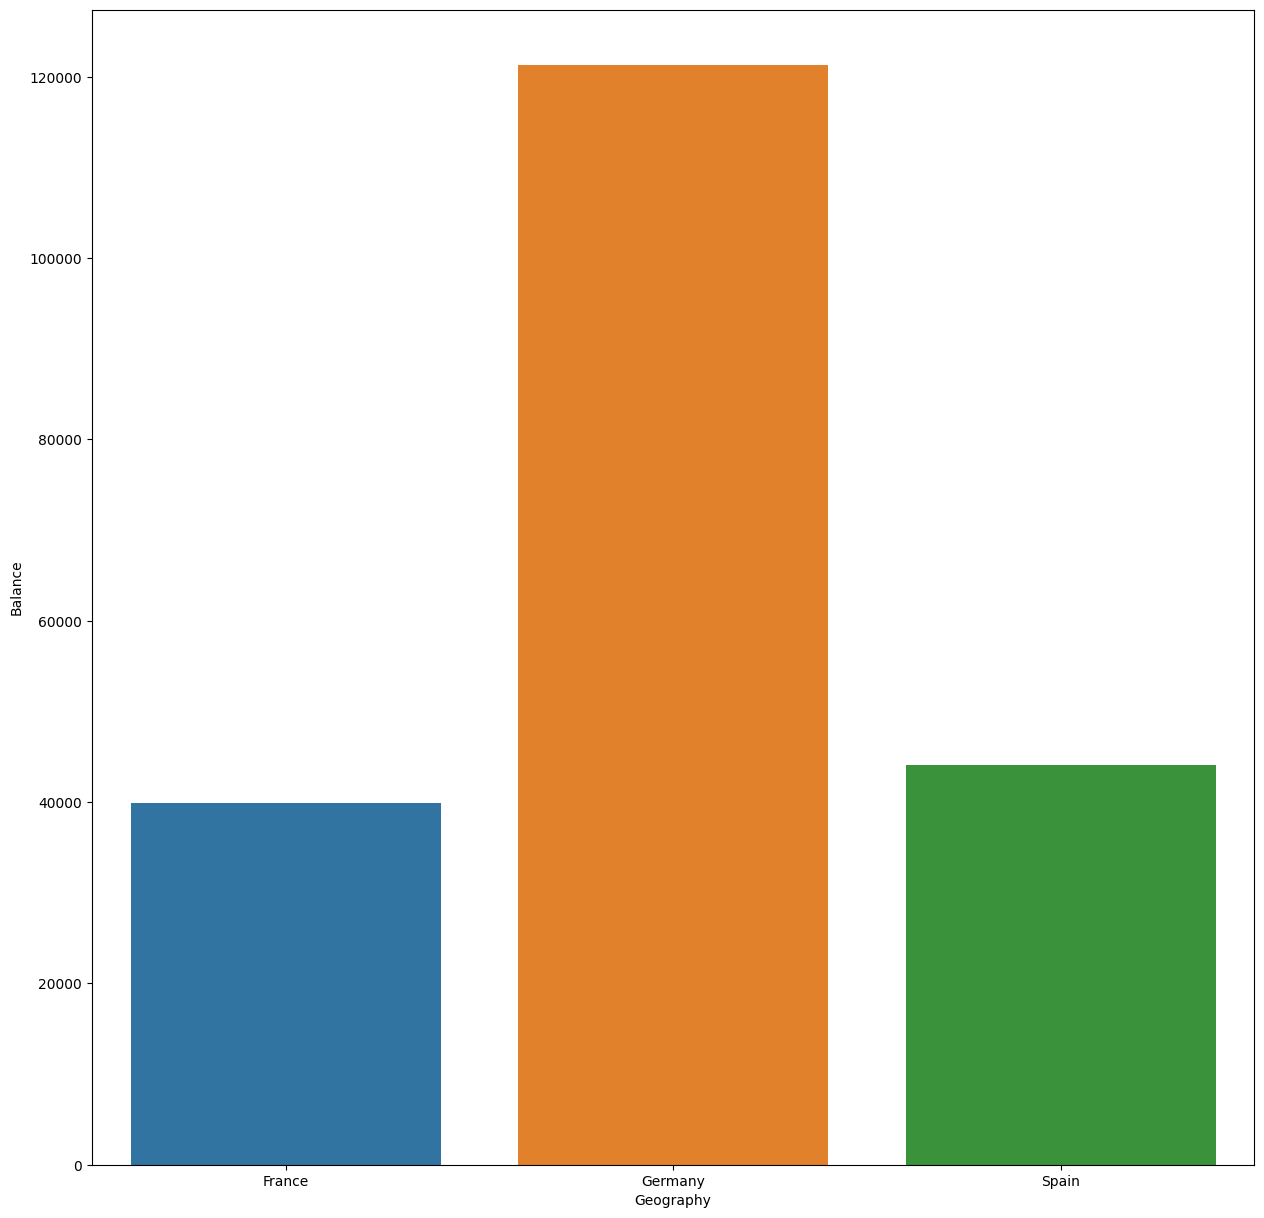

In [50]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_asset , x='Geography', y='Balance')
plt.show()

In [51]:
exited_country_credit= exited.groupby('Geography')['CreditScore'].mean().reset_index()

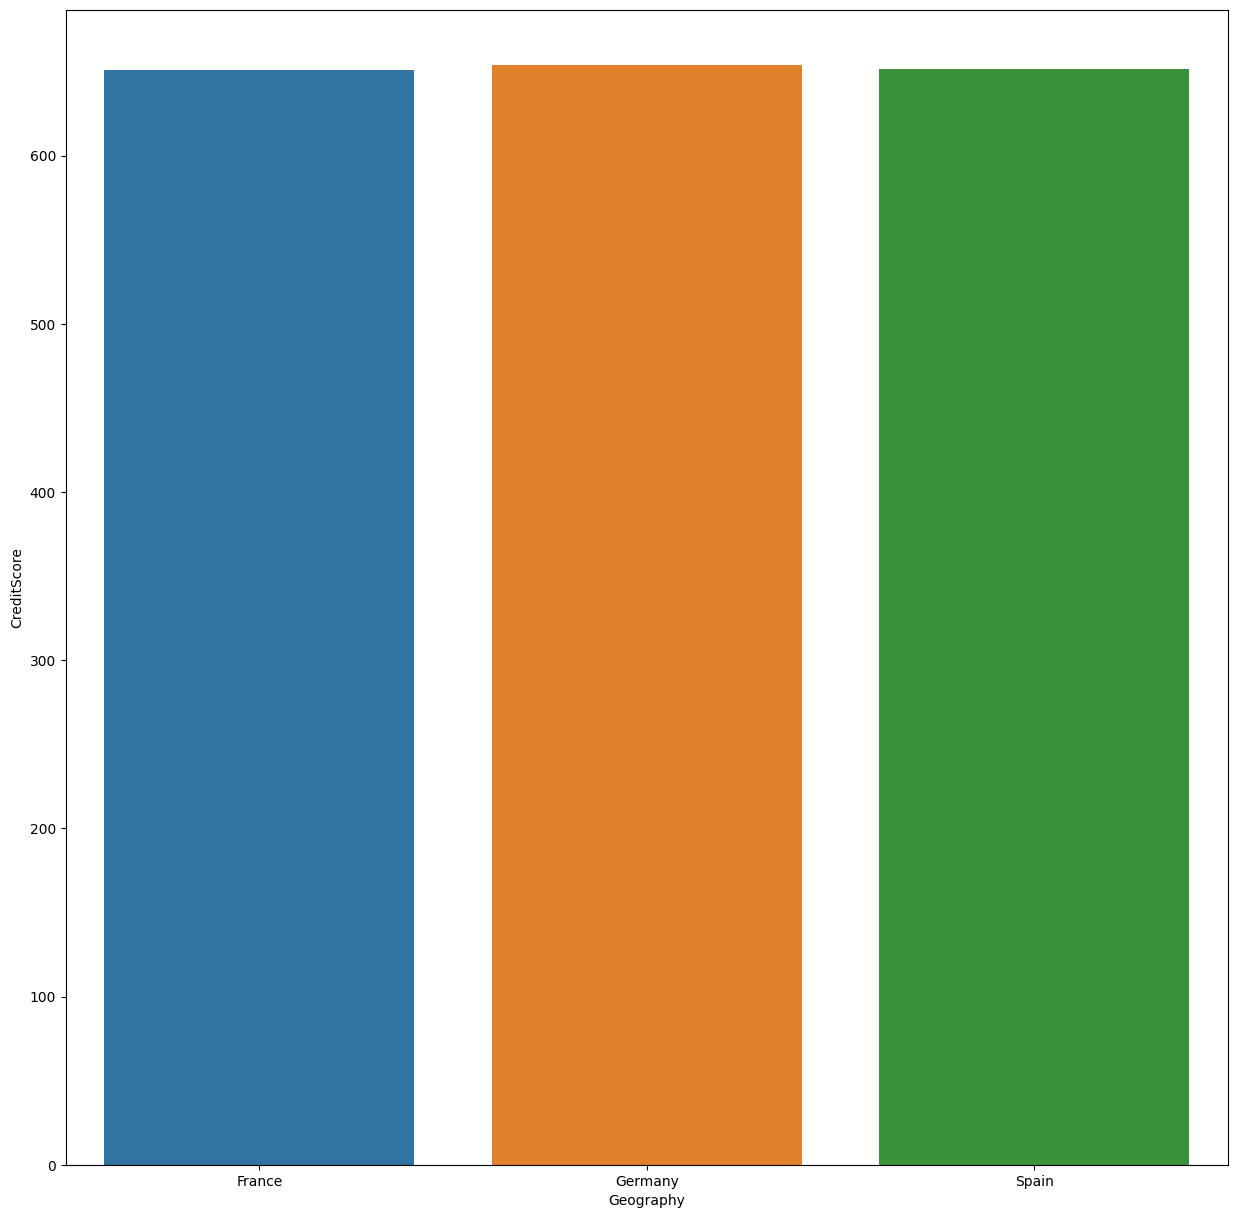

In [52]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_credit , x='Geography', y='CreditScore')
plt.show()

In [53]:
exited_country_length= exited.groupby('Geography')['Tenure'].mean().reset_index()

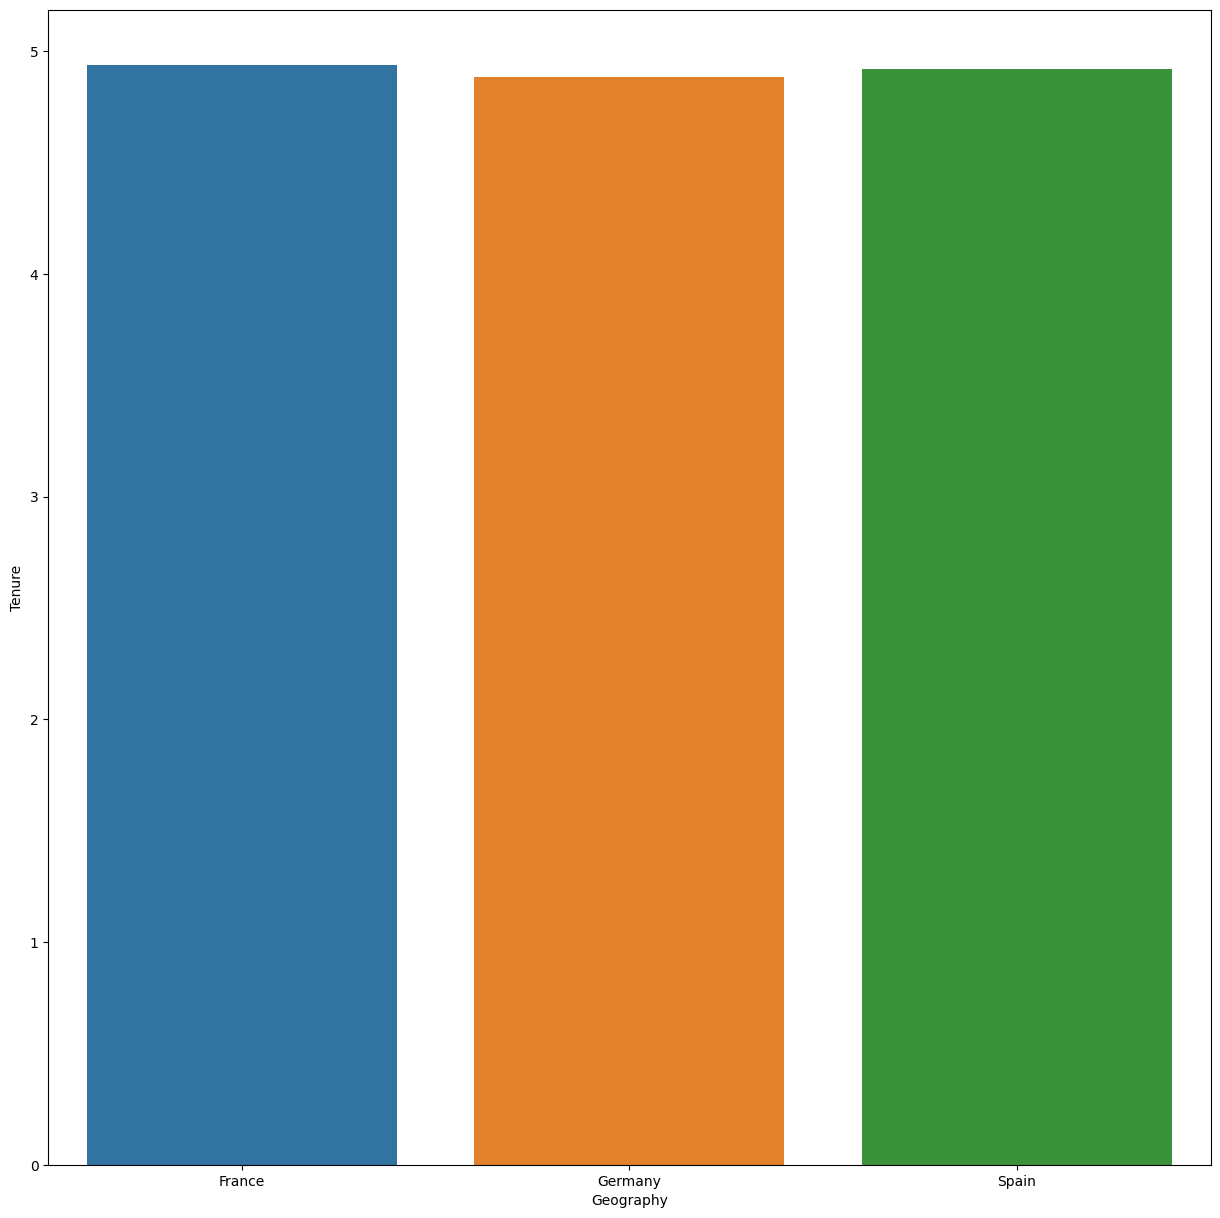

In [54]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_length , x='Geography', y='Tenure')
plt.show()

In [55]:
exited_country_total_asset= exited.groupby('Geography')['Total_asset'].mean().reset_index()

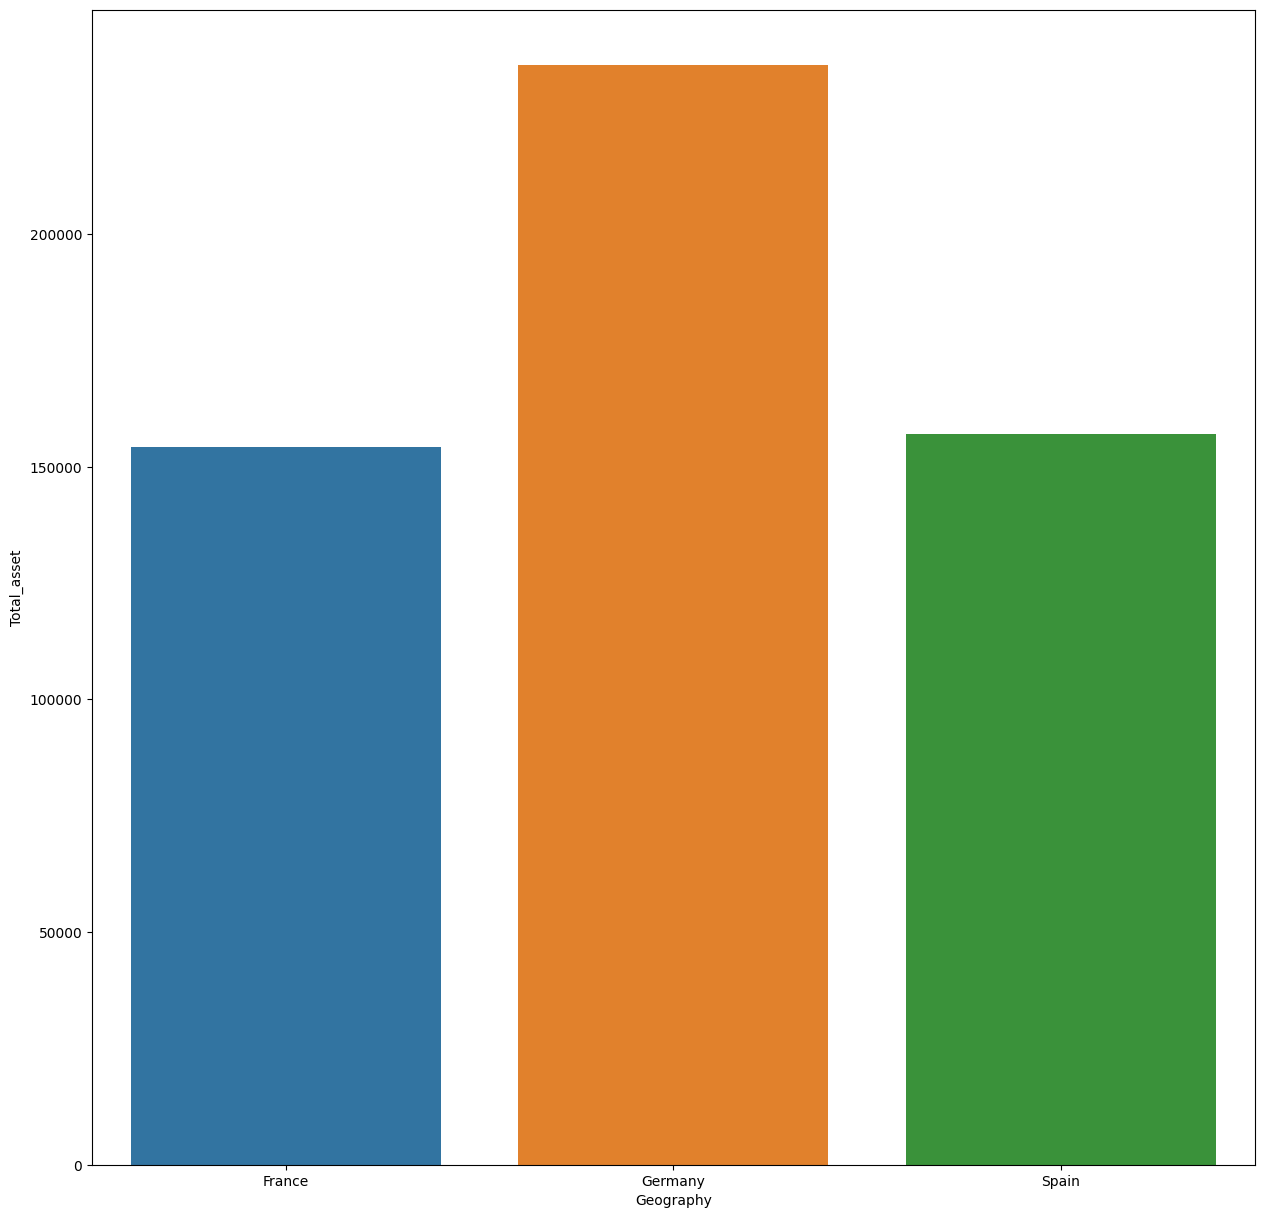

In [56]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_total_asset , x='Geography', y='Total_asset')
plt.show()

In [57]:
exited_country_salary= exited.groupby('Geography')['EstimatedSalary'].mean().reset_index()

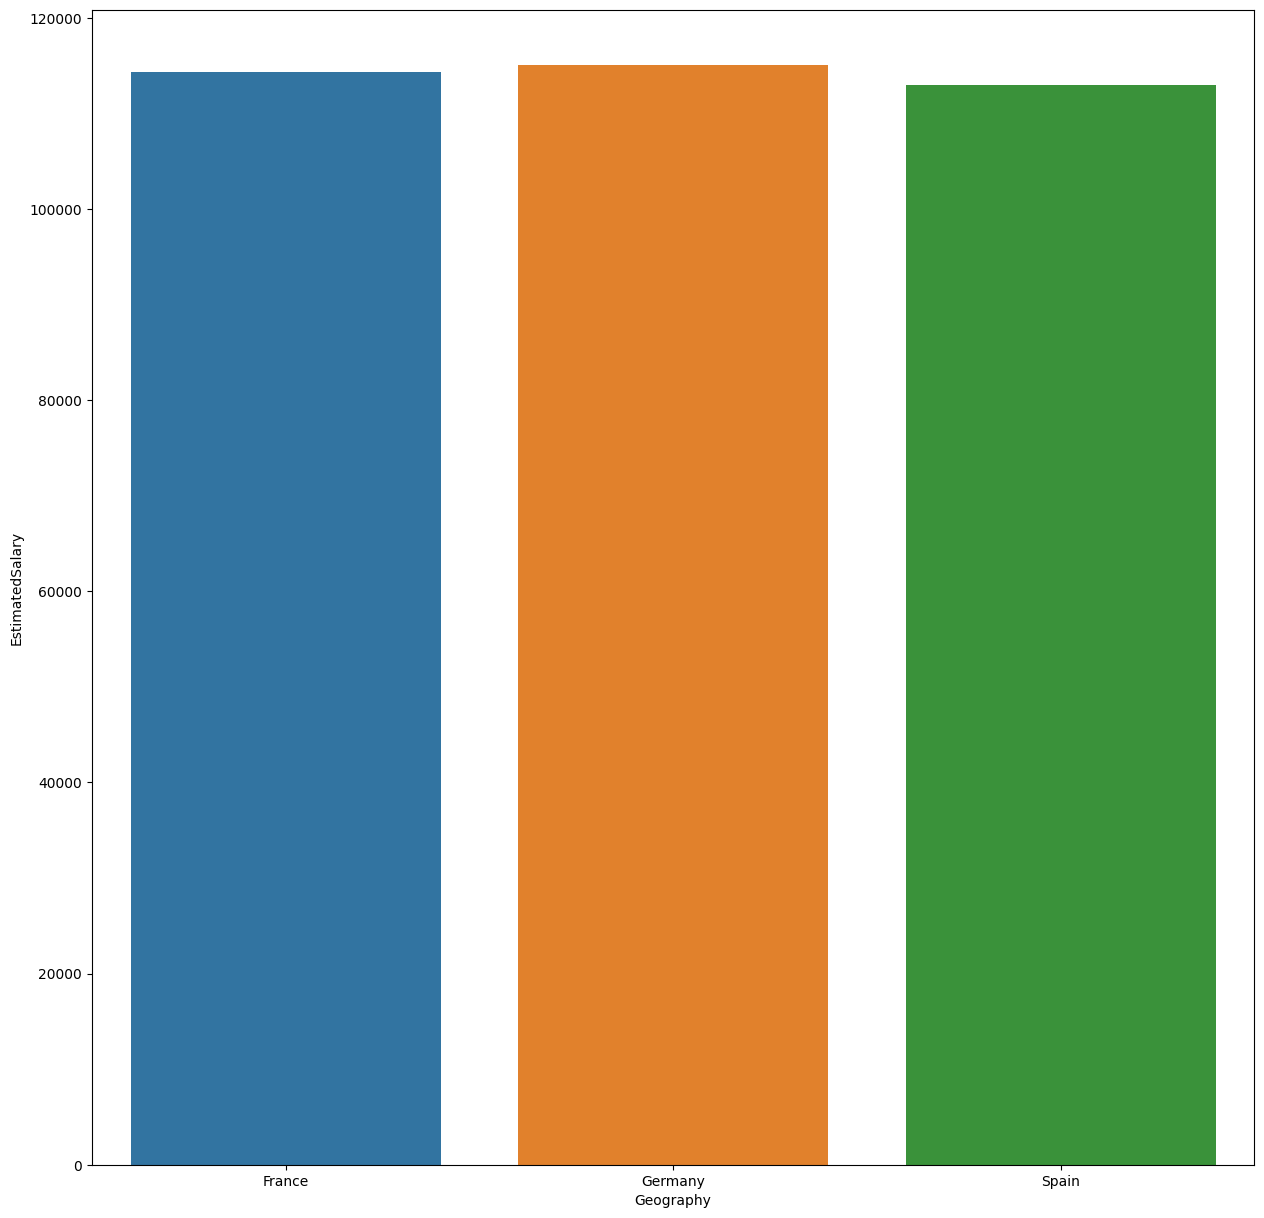

In [58]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_salary , x='Geography', y='EstimatedSalary')
plt.show()

In [59]:
exited_country_ratio= exited.groupby('Geography')['Balance_vs_Salary'].mean().reset_index()

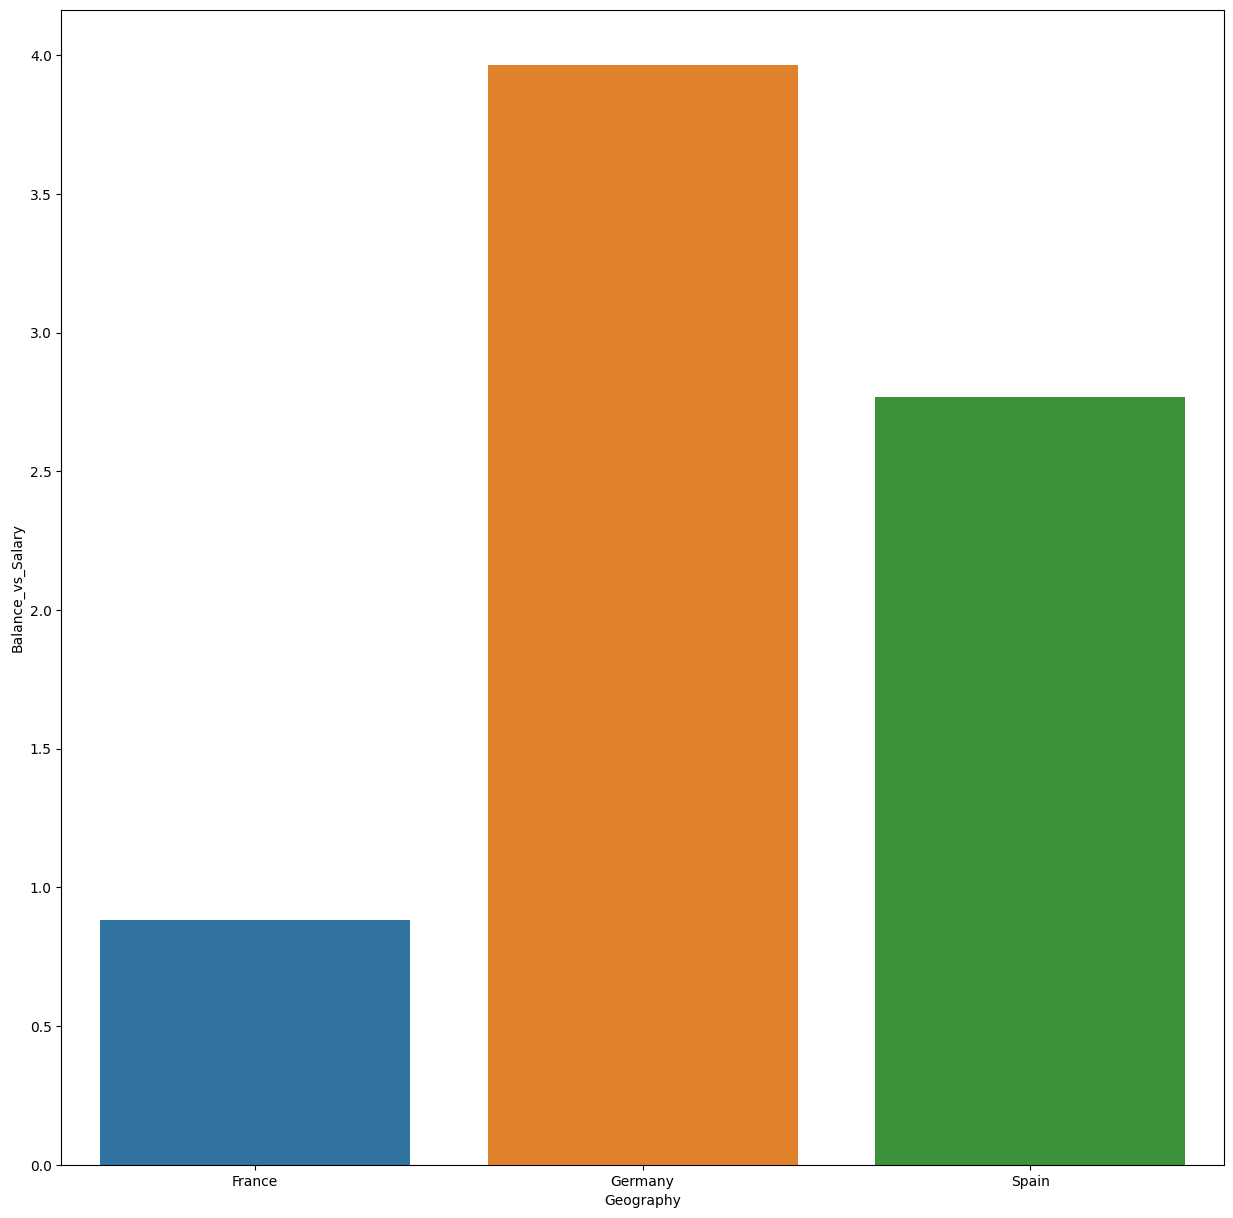

In [60]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_ratio , x='Geography', y='Balance_vs_Salary')
plt.show()

In [61]:
exited_country_products= exited.groupby(['Geography','NumOfProducts'])['Exited'].count().reset_index()

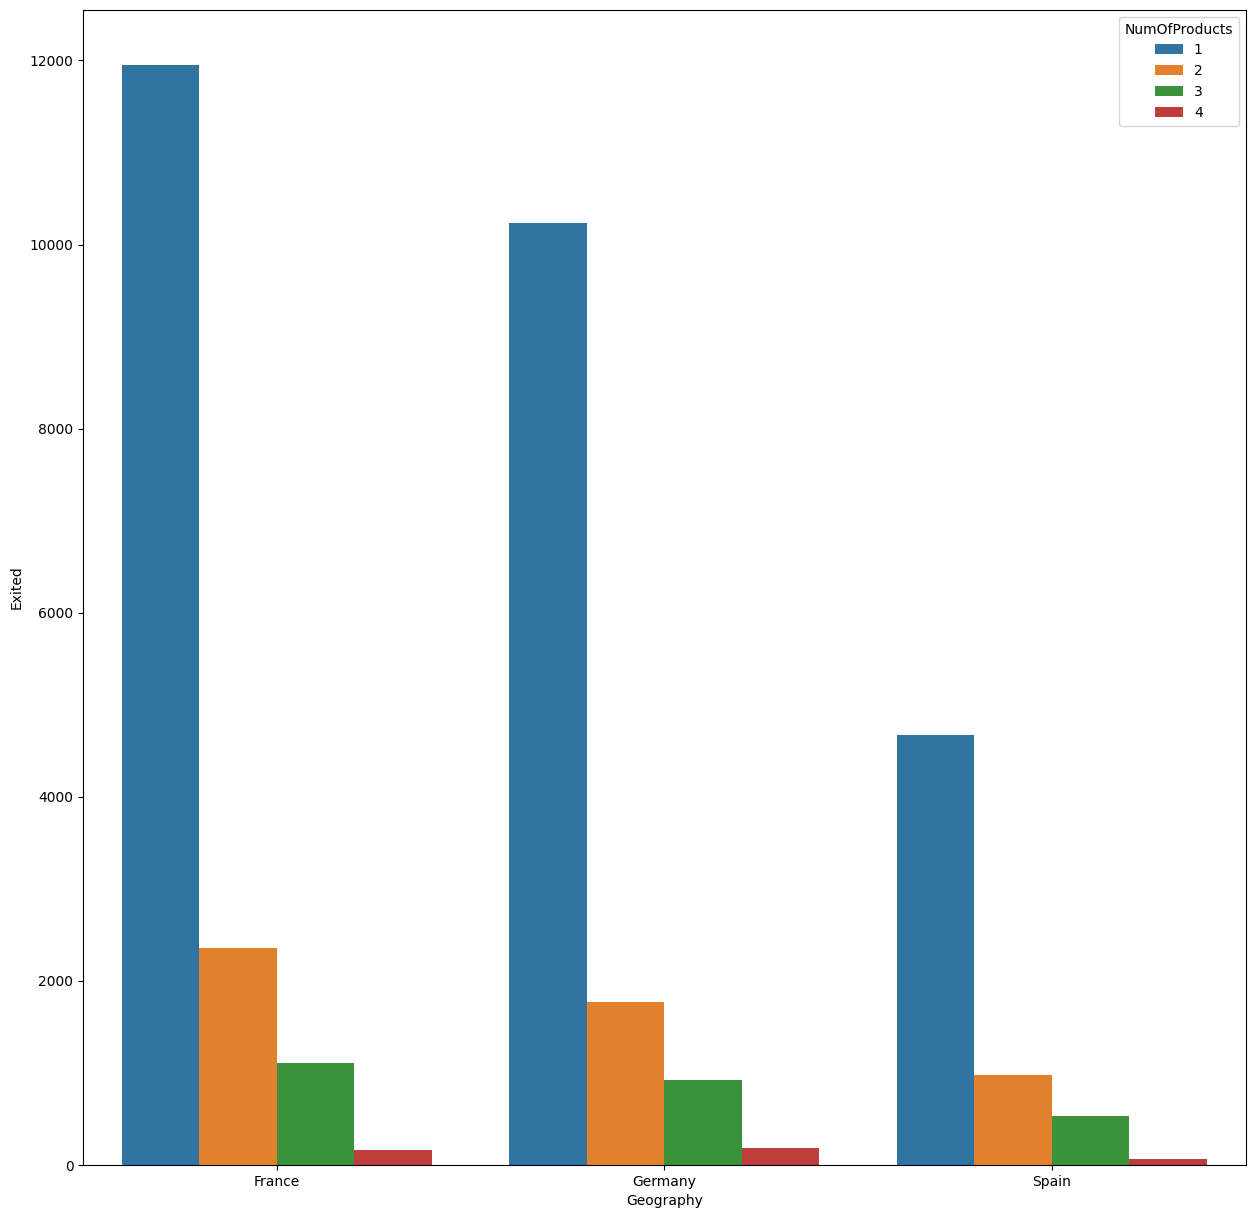

In [62]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_products , x='Geography', y='Exited',hue='NumOfProducts')
plt.show()

In [63]:
exited_country_active= exited.groupby(['Geography','IsActiveMember'])['Exited'].count().reset_index()

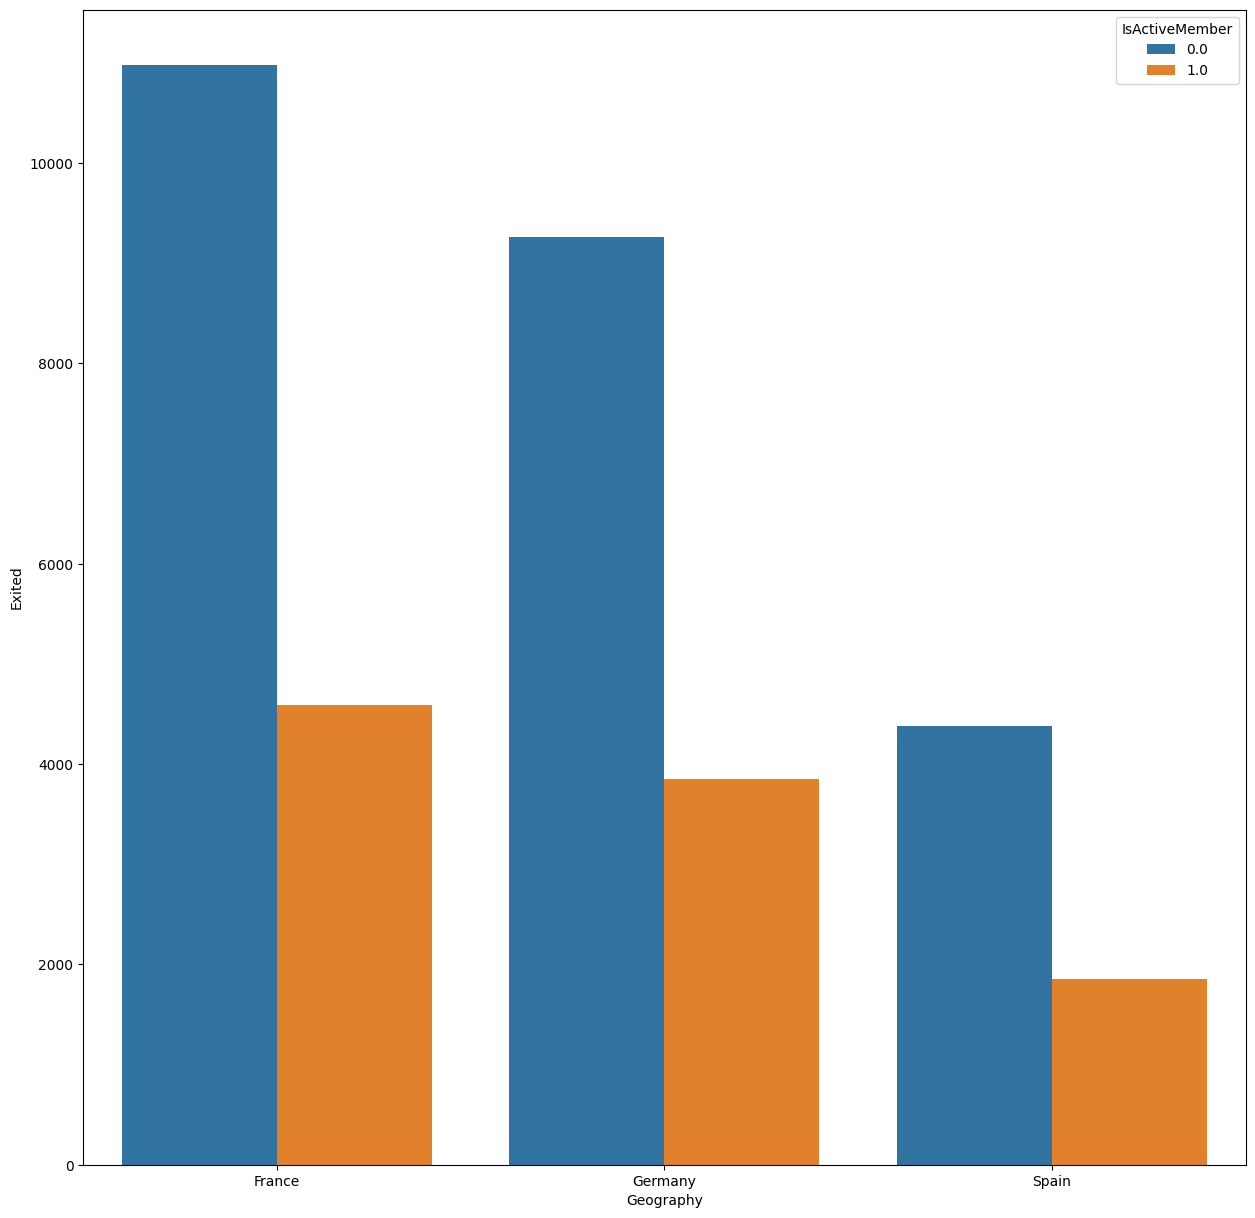

In [64]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_active , x='Geography', y='Exited',hue='IsActiveMember')
plt.show()

In [65]:
exited_country_generation= exited.groupby(['Geography','Generation'])['Exited'].count().reset_index()

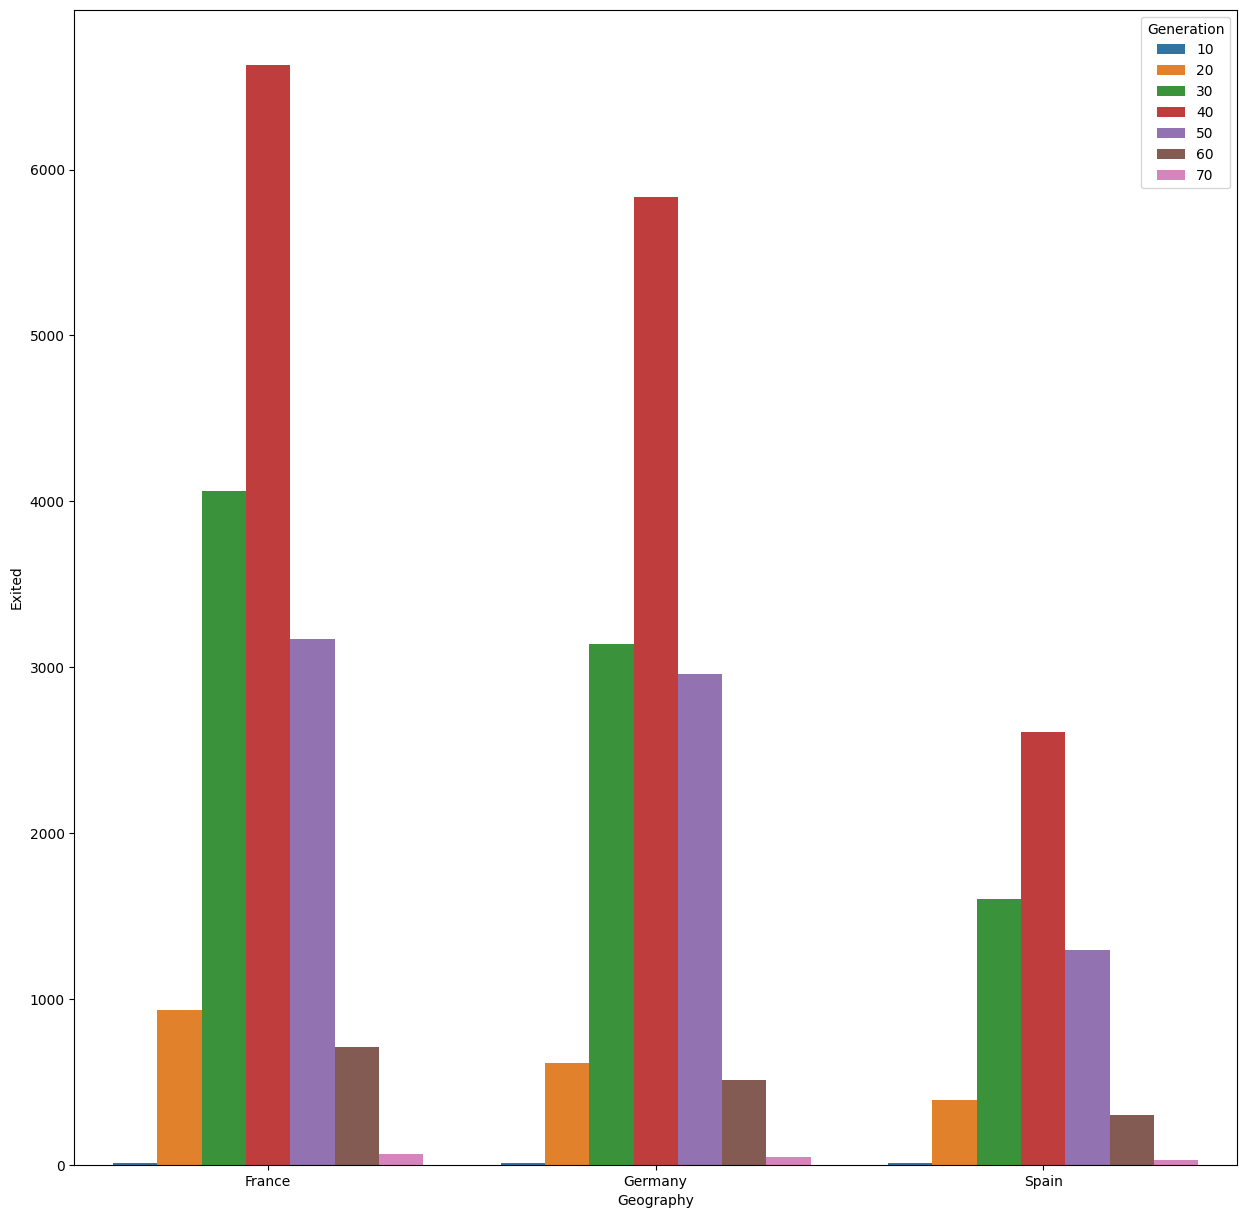

In [66]:
plt.figure(figsize=(15, 15))
sns.barplot(data=exited_country_generation , x='Geography', y='Exited',hue='Generation')
plt.show()

- 독일이 은행 계좌에 돈을 많이 넣는데 이탈율이 제일 높다
- 독일인이 만족하는 상품이나 서비스를 잘 못받는거 같다
- 프랑스인이 대부분인것을 보아 프랑스 은행이라고 생각 했을때 세금이 문제가 아니였을까


In [67]:
bank_account_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Generation,Balance_vs_Salary,Total_asset
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,30,0.000000,181449.97
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,30,0.000000,49503.50
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,40,0.000000,184866.69
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30,1.760655,233443.42
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,30,0.000000,15068.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,30,0.000000,131834.75
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,30,0.000000,131834.45
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,30,0.000000,127429.56
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,30,2.269582,232706.03


In [68]:
dummies_df = pd.get_dummies(bank_account_df['Geography'], prefix='Geography')

In [69]:
bank_account_df = pd.concat([bank_account_df, dummies_df], axis=1)

In [70]:
bank_account_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Generation,Balance_vs_Salary,Total_asset,Geography_France,Geography_Germany,Geography_Spain
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,30,0.000000,181449.97,True,False,False
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,30,0.000000,49503.50,True,False,False
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,40,0.000000,184866.69,True,False,False
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30,1.760655,233443.42,True,False,False
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,30,0.000000,15068.83,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,30,0.000000,131834.75,False,False,True
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,30,0.000000,131834.45,True,False,False
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,30,0.000000,127429.56,True,False,False
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,30,2.269582,232706.03,False,False,True


In [71]:
dummies_df = pd.get_dummies(bank_account_df['Gender'], prefix='Gender')

In [72]:
bank_account_df = pd.concat([bank_account_df, dummies_df], axis=1)

In [73]:
bank_account_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Generation',
       'Balance_vs_Salary', 'Total_asset', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [253]:
X = bank_account_df[['CreditScore','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Age','Balance_vs_Salary'	,'Total_asset', 'Geography_France','Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']]
y=bank_account_df['Exited']

In [254]:
scaler = StandardScaler()

In [255]:
scaled_features = scaler.fit_transform(X)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [257]:
xgboost = XGBClassifier()

In [258]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [259]:
y_pred_xg = xgboost.predict(X_test)

In [260]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f'정확도: {accuracy_xg:.4f}')

정확도: 0.8661


In [261]:
y_probs = xgboost.predict_proba(X_test)[:, 1]

In [262]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

0.8893690498779028

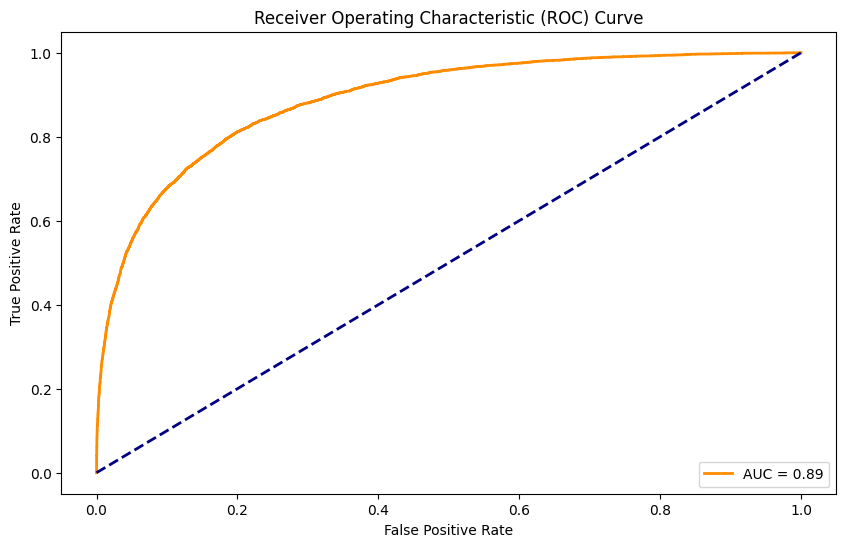

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [162]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)  # n_components는 유지할 주성분의 개수를 나타냅니다.
principal_components = pca.fit_transform(scaled_features)

In [264]:
feature_importance = xgboost.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.00911078 0.00731922 0.03087598 0.50377005 0.01017851 0.15057154
 0.00943367 0.12700218 0.01204161 0.01030834 0.0064692  0.07470888
 0.00967263 0.03853731 0.        ]


In [269]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50,100,110],
    'max_depth': [7,8,9]
}

In [289]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='roc_auc', cv=10)

In [290]:
# 모델 훈련 및 튜닝
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [291]:
y_pred_xg = grid_search.predict(X_test)

In [292]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f'정확도: {accuracy_xg:.4f}')

정확도: 0.8668


In [293]:
y_probs = grid_search.predict_proba(X_test)[:, 1]

In [294]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

0.8907752045541169

In [ ]:
random_forest_all_col = RandomForestClassifier()

In [341]:
random_forest_all_col.fit(X_train, y_train)

RandomForestClassifier()

In [342]:
y_pred_ran = random_forest_all_col.predict(X_test)


In [343]:
accuracy_ran = accuracy_score(y_test, y_pred_ran)
print(f'정확도: {accuracy_ran:.4f}')

정확도: 0.8594


In [344]:
y_probs = random_forest_all_col.predict_proba(X_test)[:, 1]

In [345]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

0.8734341638828155

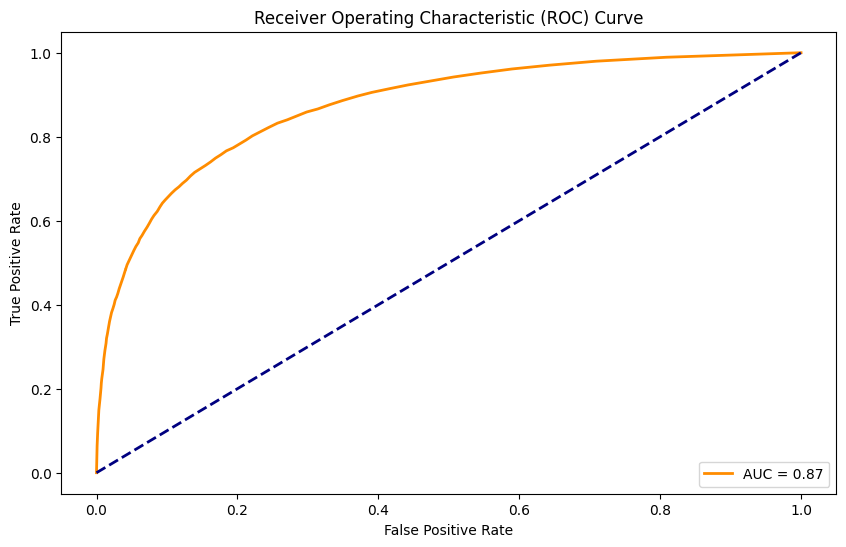

In [346]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [276]:
lgbm_all_col = LGBMClassifier()

In [277]:
lgbm_all_col.fit(X_train, y_train)

LGBMClassifier()

In [278]:
y_pred_lgbm = lgbm_all_col.predict(X_test)

In [279]:
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f'정확도: {accuracy_lgbm:.4f}')

정확도: 0.8679


In [280]:
y_probs = lgbm_all_col.predict_proba(X_test)[:, 1]

In [281]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

0.8909213095128109

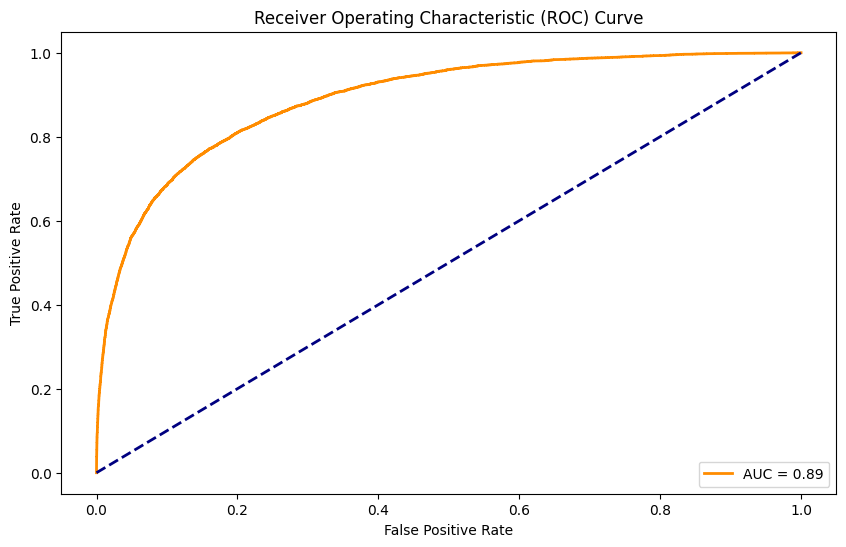

In [282]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [283]:
grid_search_lgbm = GridSearchCV(estimator=lgbm_all_col, param_grid=param_grid, scoring='roc_auc', cv=10)

In [284]:
# 모델 훈련 및 튜닝
grid_search_lgbm.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search_lgbm .best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 110}


In [285]:
y_pred_lgbm = grid_search_lgbm.predict(X_test)

In [286]:
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f'정확도: {accuracy_lgbm:.4f}')

정확도: 0.8683


In [287]:
y_probs = grid_search_lgbm.predict_proba(X_test)[:, 1]

In [288]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

0.8907857845112739

In [354]:
bank_account_df_t

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [196]:
bank_account_df_t['Generation'] = bank_account_df_t['Age'].apply(generation)

In [197]:
bank_account_df_t['Balance_vs_Salary'] =bank_account_df_t['Balance']/bank_account_df_t['EstimatedSalary'] 

In [198]:
bank_account_df_t['Total_asset']= bank_account_df_t['Balance']+bank_account_df_t['EstimatedSalary']

In [199]:
bank_account_df_t

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Generation,Balance_vs_Salary,Total_asset
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,20,0.000000,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,40,0.000000,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,30,0.000000,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,30,0.000000,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,30,0.869703,260694.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,20,0.783994,264187.44
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,30,4.220613,220214.21
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38,30,0.000000,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58,30,0.000000,158816.58


In [200]:
dummies_df = pd.get_dummies(bank_account_df_t['Geography'], prefix='Geography')

In [201]:
bank_account_df_t = pd.concat([bank_account_df_t, dummies_df], axis=1)

In [202]:
dummies_df = pd.get_dummies(bank_account_df_t['Gender'], prefix='Gender')

In [203]:
bank_account_df_t = pd.concat([bank_account_df_t, dummies_df], axis=1)

In [204]:
bank_account_df_t

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Generation,Balance_vs_Salary,Total_asset,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,...,1.0,160976.75,20,0.000000,160976.75,True,False,False,True,False
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,...,0.0,72549.27,40,0.000000,72549.27,True,False,False,True,False
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,...,0.0,138882.09,30,0.000000,138882.09,True,False,False,True,False
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,...,0.0,113931.57,30,0.000000,113931.57,True,False,False,False,True
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,...,0.0,139431.00,30,0.869703,260694.62,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,...,1.0,148087.62,20,0.783994,264187.44,False,False,True,False,True
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,...,1.0,42181.68,30,4.220613,220214.21,True,False,False,True,False
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,...,0.0,16287.38,30,0.000000,16287.38,True,False,False,False,True
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,...,1.0,158816.58,30,0.000000,158816.58,True,False,False,True,False


In [205]:
x = bank_account_df_t[['CreditScore','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Age', 'Geography_France','Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']]


In [206]:
X= scaler.transform(x)


In [366]:
ran_test = random_forest_all_col.predict(X)

In [207]:
xg_test = xgboost.predict(X)

In [393]:
best_search = grid_search.predict(X)

In [368]:
lgbm_test = lgbm_all_col.predict(X)

In [397]:
lgbm_test_best = grid_search.predict(X)

In [369]:
submission

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5
...,...,...
110018,275052,0.5
110019,275053,0.5
110020,275054,0.5
110021,275055,0.5


In [208]:
submission['Exited']=xg_test

In [209]:
submission.to_csv("submission.csv",index=False)